In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from pathlib import Path
import scipy.stats as stats
from scipy.stats import probplot, chi2_contingency, chi2




In [ ]:
cc=pd.read_csv("Credit_card[2].csv")
cc

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0     5008827      M         Y             Y         0       180000.0   
1     5009744      F         Y             N         0       315000.0   
2     5009746      F         Y             N         0       315000.0   
3     5009749      F         Y             N         0            NaN   
4     5009752      F         Y             N         0       315000.0   
...       ...    ...       ...           ...       ...            ...   
1543  5028645      F         N             Y         0            NaN   
1544  5023655      F         N             N         0       225000.0   
1545  5115992      M         Y             Y         2       180000.0   
1546  5118219      M         Y             N         0       270000.0   
1547  5053790      F         Y             Y         0       225000.0   

               Type_Income                      EDUCATION  \
0                Pensioner               Higher education   
1     Commercial associate               Higher education   
2     Commercial associate               Higher education   
3     Commercial associate               Higher education   
4     Commercial associate               Higher education   
...                    ...                            ...   
1543  Commercial associate               Higher education   
1544  Commercial associate              Incomplete higher   
1545               Working               Higher education   
1546               Working  Secondary / secondary special   
1547               Working               Higher education   

            Marital_status       Housing_type  Birthday_count  Employed_days  \
0                  Married  House / apartment        -18772.0         365243   
1                  Married  House / apartment        -13557.0           -586   
2                  Married  House / apartment             NaN           -586   
3                  Married  House / apartment        -13557.0           -586   
4                  Married  House / apartment        -13557.0           -586   
...                    ...                ...             ...            ...   
1543               Married  House / apartment        -11957.0          -2182   
1544  Single / not married  House / apartment        -10229.0          -1209   
1545               Married  House / apartment        -13174.0          -2477   
1546        Civil marriage  House / apartment        -15292.0           -645   
1547               Married  House / apartment        -16601.0          -2859   

      Mobile_phone  Work_Phone  Phone  EMAIL_ID Type_Occupation  \
0                1           0      0         0             NaN   
1                1           1      1         0             NaN   
2                1           1      1         0             NaN   
3                1           1      1         0             NaN   
4                1           1      1         0             NaN   
...            ...         ...    ...       ...             ...   
1543             1           0      0         0        Managers   
1544             1           0      0         0     Accountants   
1545             1           0      0         0        Managers   
1546             1           1      1         0         Drivers   
1547             1           0      0         0             NaN   

      Family_Members  
0                  2  
1                  2  
2                  2  
3                  2  
4                  2  
...              ...  
1543               2  
1544               1  
1545               4  
1546               2  
1547               2  

[1548 rows x 18 columns]

In [ ]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [ ]:
cc.describe()

Ind_ID     CHILDREN  Annual_income  Birthday_count  \
count  1.548000e+03  1548.000000   1.525000e+03     1526.000000   
mean   5.078920e+06     0.412791   1.913993e+05   -16040.342071   
std    4.171759e+04     0.776691   1.132530e+05     4229.503202   
min    5.008827e+06     0.000000   3.375000e+04   -24946.000000   
25%    5.045070e+06     0.000000   1.215000e+05   -19553.000000   
50%    5.078842e+06     0.000000   1.665000e+05   -15661.500000   
75%    5.115673e+06     1.000000   2.250000e+05   -12417.000000   
max    5.150412e+06    14.000000   1.575000e+06    -7705.000000   

       Employed_days  Mobile_phone   Work_Phone        Phone     EMAIL_ID  \
count    1548.000000        1548.0  1548.000000  1548.000000  1548.000000   
mean    59364.689922           1.0     0.208010     0.309432     0.092377   
std    137808.062701           0.0     0.406015     0.462409     0.289651   
min    -14887.000000           1.0     0.000000     0.000000     0.000000   
25%     -3174.500000           1.0     0.000000     0.000000     0.000000   
50%     -1565.000000           1.0     0.000000     0.000000     0.000000   
75%      -431.750000           1.0     0.000000     1.000000     0.000000   
max    365243.000000           1.0     1.000000     1.000000     1.000000   

       Family_Members  
count     1548.000000  
mean         2.161499  
std          0.947772  
min          1.000000  
25%          2.000000  
50%          2.000000  
75%          3.000000  
max         15.000000

In [ ]:
#checking for missing values
cc.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
dtype: int64

In [ ]:
!pip install pandas_profiling
import pandas_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 13.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 28.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=62eb40f3e88b6466d3a22cc86e9539e9767b0e6ae243b8cf10172eef1e6061b6
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.2.1
    Uninstalling pydantic-2.

<ipython-input-7-303b0fc56fa5>:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [ ]:
#from pandas_profiling
#prof=ProfileReport(cc)prof.to_file(output_file='output.html')
profile=cc.profile_report(title="pandas profiling report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
cl=pd.read_csv("Credit_card_label[1].csv")
cl

Ind_ID  label
0     5008827      1
1     5009744      1
2     5009746      1
3     5009749      1
4     5009752      1
...       ...    ...
1543  5028645      0
1544  5023655      0
1545  5115992      0
1546  5118219      0
1547  5053790      0

[1548 rows x 2 columns]

In [ ]:
#merging two dataframes
c=cc.merge(cl,how="inner",on=['Ind_ID'])
c

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0     5008827      M         Y             Y         0       180000.0   
1     5009744      F         Y             N         0       315000.0   
2     5009746      F         Y             N         0       315000.0   
3     5009749      F         Y             N         0            NaN   
4     5009752      F         Y             N         0       315000.0   
...       ...    ...       ...           ...       ...            ...   
1543  5028645      F         N             Y         0            NaN   
1544  5023655      F         N             N         0       225000.0   
1545  5115992      M         Y             Y         2       180000.0   
1546  5118219      M         Y             N         0       270000.0   
1547  5053790      F         Y             Y         0       225000.0   

               Type_Income                      EDUCATION  \
0                Pensioner               Higher education   
1     Commercial associate               Higher education   
2     Commercial associate               Higher education   
3     Commercial associate               Higher education   
4     Commercial associate               Higher education   
...                    ...                            ...   
1543  Commercial associate               Higher education   
1544  Commercial associate              Incomplete higher   
1545               Working               Higher education   
1546               Working  Secondary / secondary special   
1547               Working               Higher education   

            Marital_status       Housing_type  Birthday_count  Employed_days  \
0                  Married  House / apartment        -18772.0         365243   
1                  Married  House / apartment        -13557.0           -586   
2                  Married  House / apartment             NaN           -586   
3                  Married  House / apartment        -13557.0           -586   
4                  Married  House / apartment        -13557.0           -586   
...                    ...                ...             ...            ...   
1543               Married  House / apartment        -11957.0          -2182   
1544  Single / not married  House / apartment        -10229.0          -1209   
1545               Married  House / apartment        -13174.0          -2477   
1546        Civil marriage  House / apartment        -15292.0           -645   
1547               Married  House / apartment        -16601.0          -2859   

      Mobile_phone  Work_Phone  Phone  EMAIL_ID Type_Occupation  \
0                1           0      0         0             NaN   
1                1           1      1         0             NaN   
2                1           1      1         0             NaN   
3                1           1      1         0             NaN   
4                1           1      1         0             NaN   
...            ...         ...    ...       ...             ...   
1543             1           0      0         0        Managers   
1544             1           0      0         0     Accountants   
1545             1           0      0         0        Managers   
1546             1           1      1         0         Drivers   
1547             1           0      0         0             NaN   

      Family_Members  label  
0                  2      1  
1                  2      1  
2                  2      1  
3                  2      1  
4                  2      1  
...              ...    ...  
1543               2      0  
1544               1      0  
1545               4      0  
1546               2      0  
1547               2      0  

[1548 rows x 19 columns]

In [ ]:
c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

# **HANDLING MISSING VALUES**

In [ ]:
import missingno as msno

<Axes: >

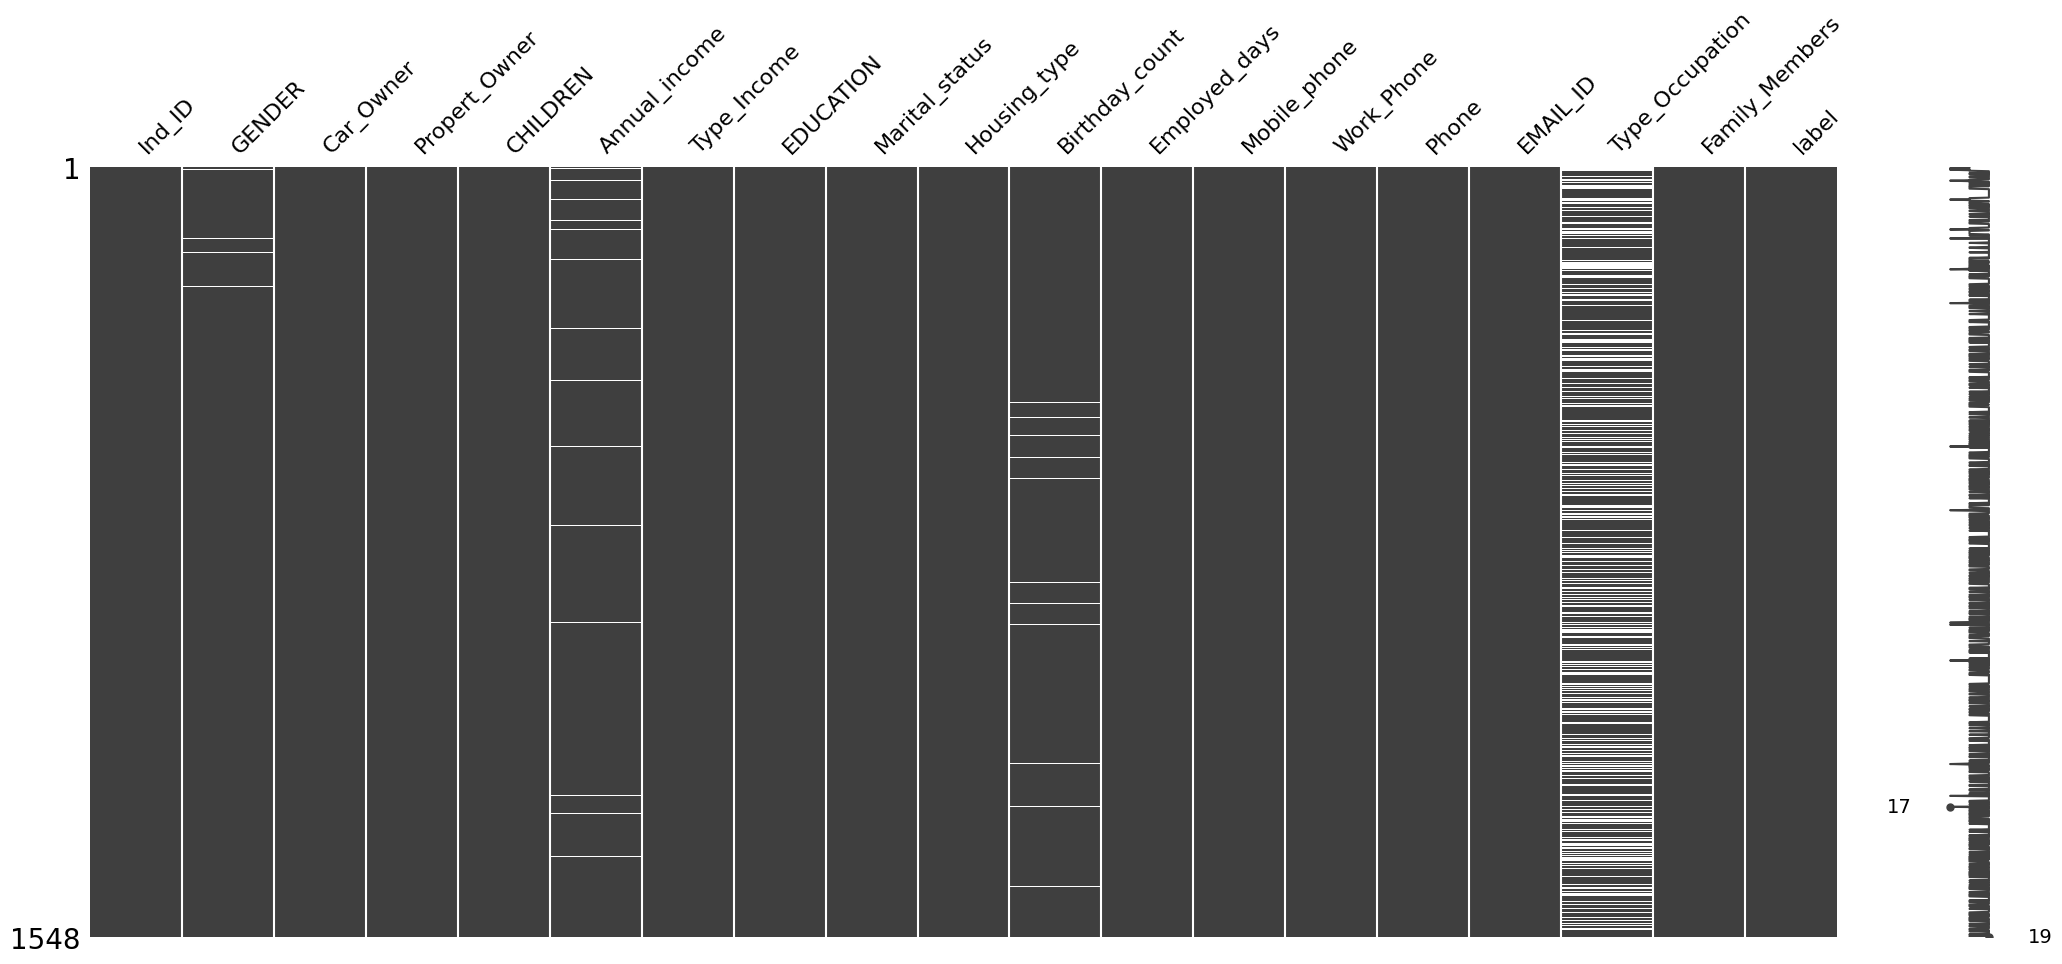

In [ ]:
msno.matrix(c)

<Axes: >

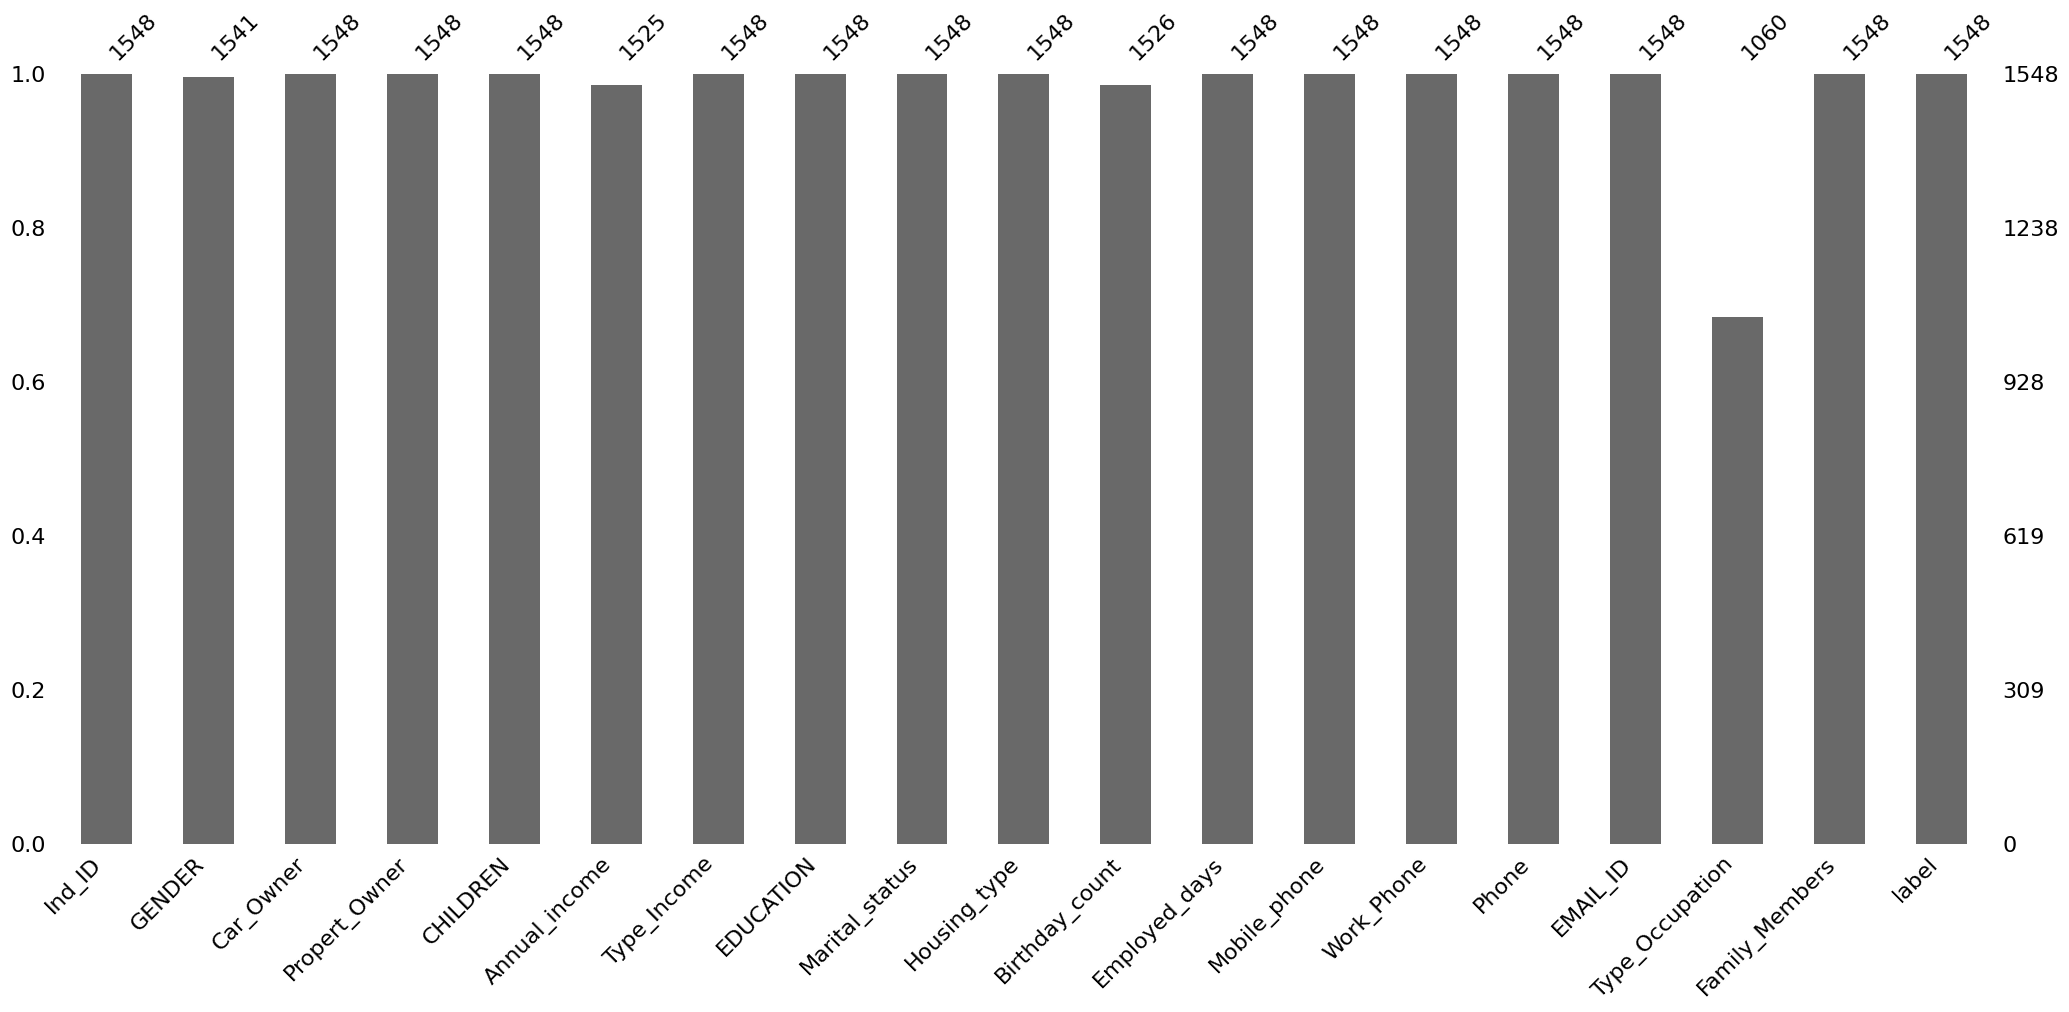

In [ ]:
msno.bar(c)

<Axes: >

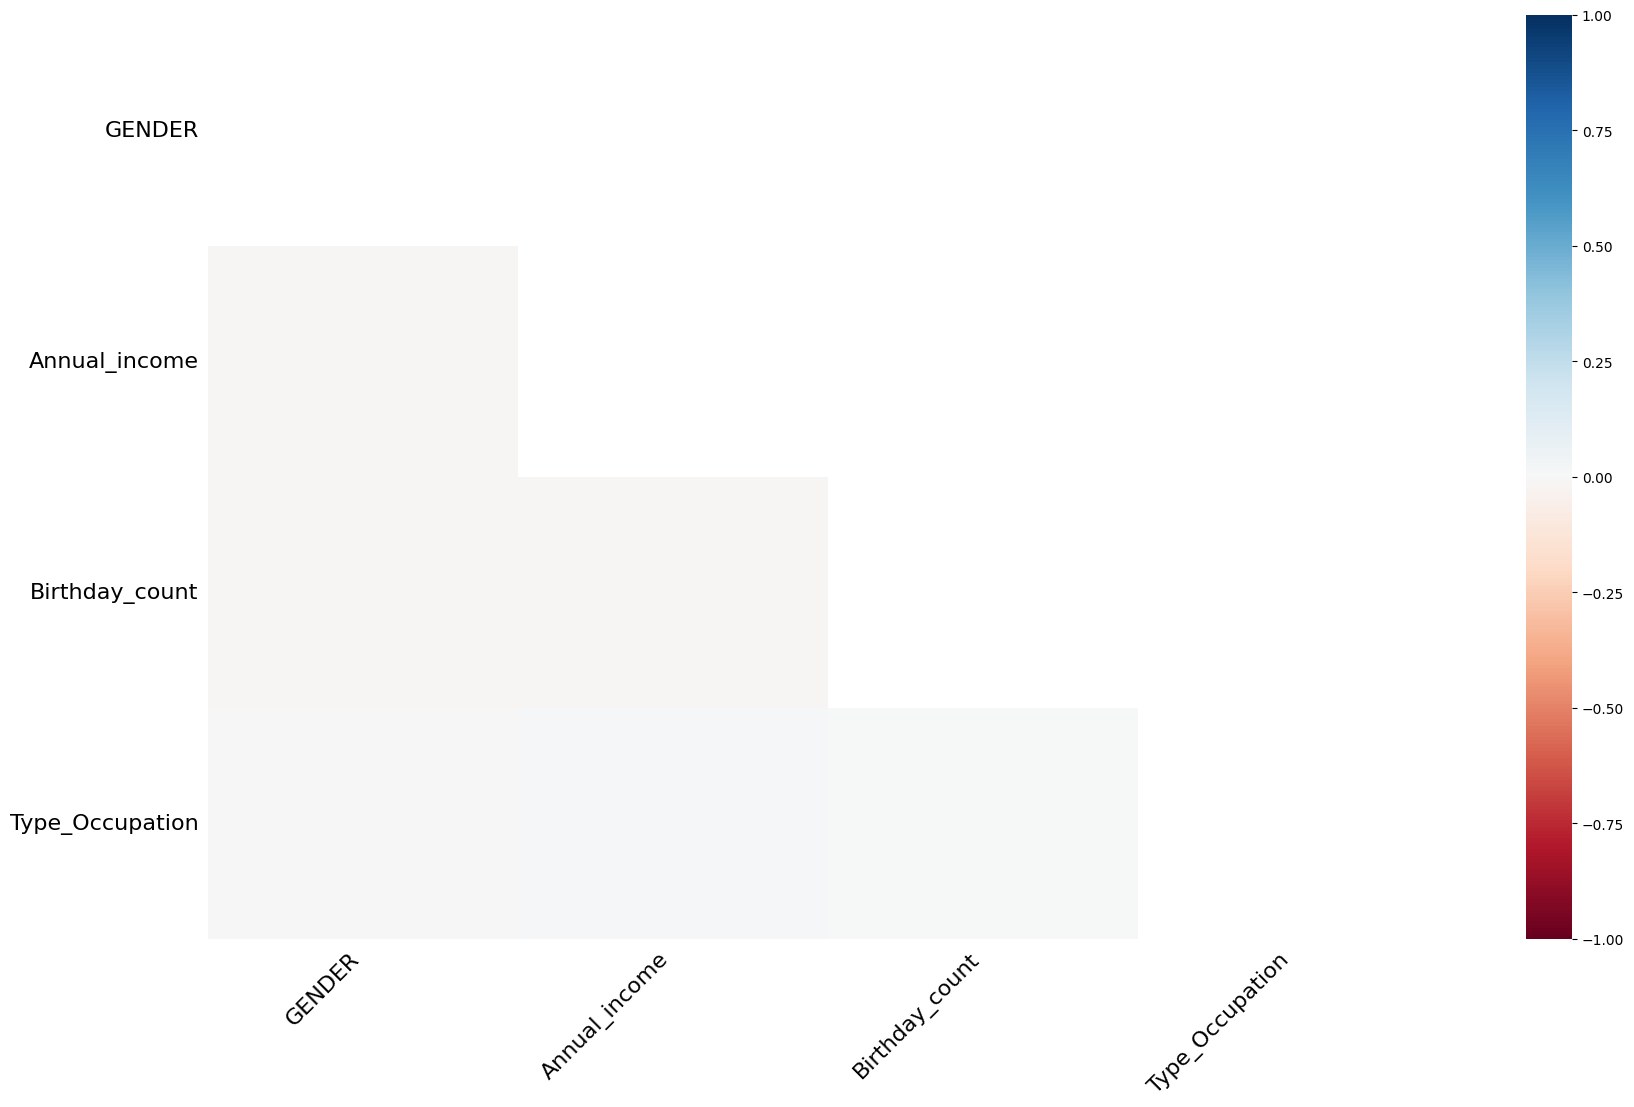

In [ ]:
#no relation betwen the missing values
#all missing values are independent of other columns
#hence all are mcar type
msno.heatmap(c)

In [ ]:
#renaming columns
c.rename(columns={"GENDER":"gender",
                  "Propert_Owner":"property_owner",
                  "CHILDREN":"children",
                  "Birthday_count":"age",
                  "Employed_days":"employed_years",
                  "label":"is_highrisk"},inplace=True)
c.columns

Index(['Ind_ID', 'gender', 'Car_Owner', 'property_owner', 'children',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'age', 'employed_years', 'Mobile_phone', 'Work_Phone',
       'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
       'is_highrisk'],
      dtype='object')

In [ ]:
#formatting age,employed_years columns
c['age']=np.abs(c['age'])//365.25
c['employed_years']=np.abs(c['employed_years'])//365.25

# **EDA**
# **univariate analysis**

In [ ]:
def value_count(feature):
  df=c
  v_count=df[feature].value_counts()
  freq=df[feature].value_counts(normalize=True)*100
  info=pd.concat([v_count,freq],axis=1)
  info.columns=['value_count','frequency(%)']
  return info

In [ ]:
def gen_info(feature):
  df=c
  match feature:
        case _:
            print('Description:\n{}'.format(df[feature].describe()))
            print('*'*50)
            print('Object type:\n{}'.format(df[feature].dtype))
            print('*'*50)
            value_cnt = value_count(feature)
            print('Value count:\n{}'.format(value_cnt))


In [ ]:
# function to create a pie chart plot
def pie_plot(feature):
  ratio_size = value_count(feature)
  ratio_size_len = len(ratio_size.index)
  ratio_list = []
  for i in range(ratio_size_len):
     ratio_list.append(ratio_size.iloc[i]['frequency(%)'])
  fig, ax = plt.subplots(figsize=(8,8))
  # %1.2f%% display decimals in the pie chart with 2 decimal places
  plt.pie(ratio_list, labels=ratio_size.index, autopct='%1.2f%%', startangle=90, wedgeprops={'edgecolor' :'black'})
  plt.title('Pie chart of {}'.format(feature),fontsize=28,fontweight="bold")
  #plt.title("percentages:\n\n{}".format(ratio_list),fontsize=28,fontweight="bold",)
  plt.legend(loc='best')
  plt.axis('equal')
  return plt.show()

In [ ]:
# function to create a bar chart plot
def bar_plot(feature):
   fig, ax = plt.subplots(figsize=(6,10))
   sns.barplot(x=value_count(feature).index,y=value_count(feature).values[:,0])
   ax.set_xticklabels(labels=value_count(feature).index,rotation=45,ha='right')
   plt.xlabel('{}'.format(feature))
   plt.ylabel('Count')
   plt.title('{} count'.format(feature))
   return plt.show()

In [ ]:
# function to create a box plot
def box_plot(feature):
    match feature:
        case 'age':
            fig, ax = plt.subplots(figsize=(2,8))
            # change the feature to be express in positive numbers days
            sns.boxplot(y=c['age'])
            plt.title('{} distribution(Boxplot)'.format(feature))
            return plt.show()
        case 'children':
            fig, ax = plt.subplots(figsize=(2,8))
            sns.boxplot(y=c[feature])
            plt.title('{} distribution(Boxplot)'.format(feature))
            plt.yticks(np.arange(0,c[feature].max(),1))
            return plt.show()
        case 'employed_years':
            fig, ax = plt.subplots(figsize=(2,8))
            #employment_len_no_ret_yrs = np.abs(employment_len_no_ret)/365.25
            sns.boxplot(y=c['employed_years'])
            plt.title('{} distribution(Boxplot)'.format(feature))
            plt.yticks(np.arange(0,c['employed_years'].max(),100))
            return plt.show()
        case 'Annual_income':
            fig, ax = plt.subplots(figsize=(2,8))
            sns.boxplot(y=c[feature])
            plt.title('{} distribution(Boxplot)'.format(feature))
            # suppress scientific notation
            ax.get_yaxis().set_major_formatter(
                matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
            return plt.show()
        case _:
            fig, ax = plt.subplots(figsize=(2,8))
            sns.boxplot(y=c[feature])
            plt.title('{} distribution(Boxplot)'.format(feature))
            return plt.show()

In [ ]:
# function to create a histogram plot
def hist_plot(feature, the_bins=50):
    match feature:
        case 'Annual_income':
            fig, ax = plt.subplots(figsize=(18,10))
            sns.histplot(c[feature],bins=the_bins,kde=True)
            # suppress scientific notation
            ax.get_xaxis().set_major_formatter(
                matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
            plt.title('{} distribution'.format(feature))
            return plt.show()
        case _:
            fig, ax = plt.subplots(figsize=(18,10))
            sns.histplot(c[feature],bins=the_bins,kde=True)
            plt.title('{} distribution'.format(feature))
            return plt.show()

In [ ]:
# High risk vs low risk applicants compared on a box plot
def low_high_risk_box_plot(feature):
    match feature:
        case 'age':
            print(c.groupby('is_highrisk')['age'].mean())
            fig, ax = plt.subplots(figsize=(5,8))
            sns.boxplot(y=c['age'],x=c['is_highrisk'])
            plt.xticks(ticks=[0,1],labels=['no','yes'])
            plt.title('High risk individuals grouped by age')
            return plt.show()
        case 'Annual_income':
            print(np.abs(c.groupby('is_highrisk')['Annual_income'].mean()))
            fig, ax = plt.subplots(figsize=(5,8))
            sns.boxplot(y=np.abs(c['Annual_income']),x=c['is_highrisk'])
            plt.xticks(ticks=[0,1],labels=['no','yes'])
            # suppress scientific notation
            ax.get_yaxis().set_major_formatter(
                matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
            plt.title('High risk individuals grouped by {}'.format(feature))
            return plt.show()
        case _:
            print(np.abs(c.groupby('is_highrisk')[feature].mean()))
            fig, ax = plt.subplots(figsize=(5,8))
            sns.boxplot(y=np.abs(cc[feature]),x=c['is_highrisk'])
            plt.xticks(ticks=[0,1],labels=['no','yes'])
            plt.title('High risk individuals grouped by {}'.format(feature))
            return plt.show()

# **GENDER**

In [ ]:
gen_info("gender")

Description:
count     1541
unique       2
top          F
freq       973
Name: gender, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
   value_count  frequency(%)
F          973     63.140818
M          568     36.859182


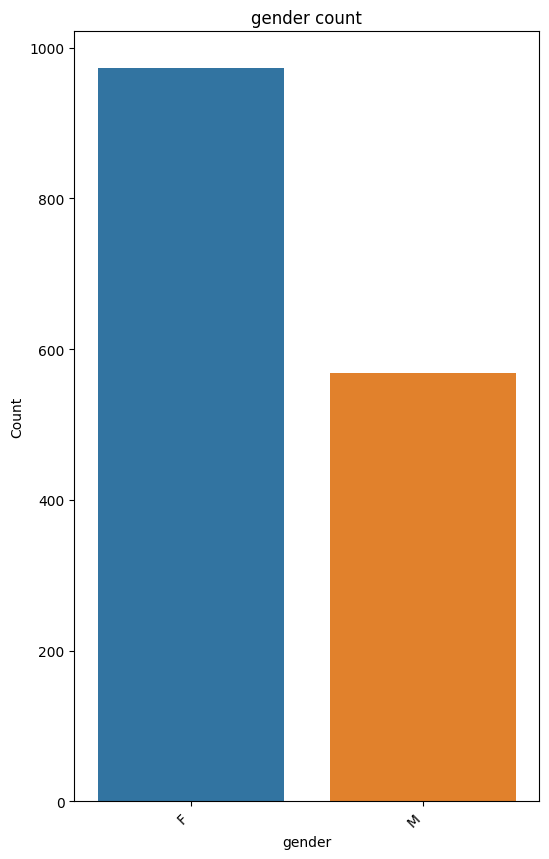

In [ ]:
bar_plot("gender")

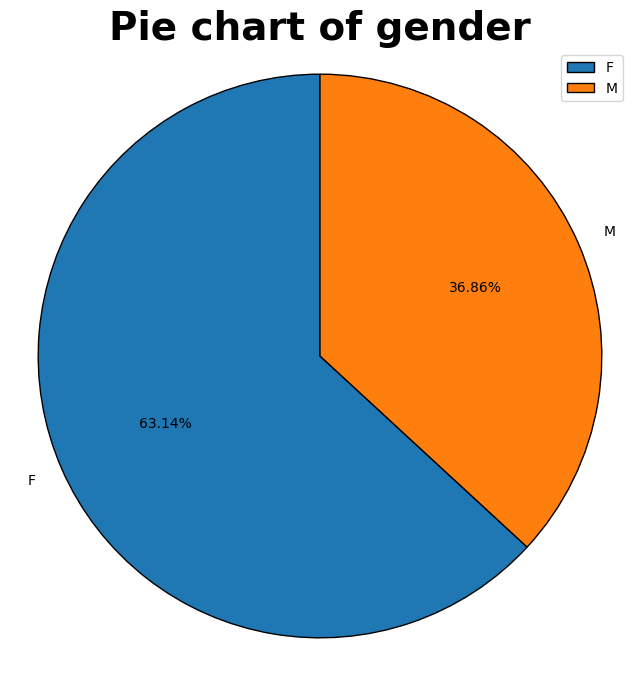

In [ ]:
pie_plot("gender")

# **Majority of the applicants are females(63%)**

# **age**

In [ ]:
gen_info('age')

Description:
count    1526.000000
mean       43.419397
std        11.582791
min        21.000000
25%        33.000000
50%        42.000000
75%        53.000000
max        68.000000
Name: age, dtype: float64
**************************************************
Object type:
float64
**************************************************
Value count:
      value_count  frequency(%)
37.0           58      3.800786
27.0           56      3.669725
32.0           53      3.473132
41.0           51      3.342071
33.0           47      3.079948
43.0           47      3.079948
39.0           46      3.014417
29.0           46      3.014417
47.0           45      2.948886
38.0           44      2.883355
31.0           43      2.817824
57.0           42      2.752294
51.0           41      2.686763
35.0           39      2.555701
42.0           39      2.555701
28.0           39      2.555701
40.0           38      2.490170
54.0           37      2.424640
34.0           37      2.424640
48.0           37

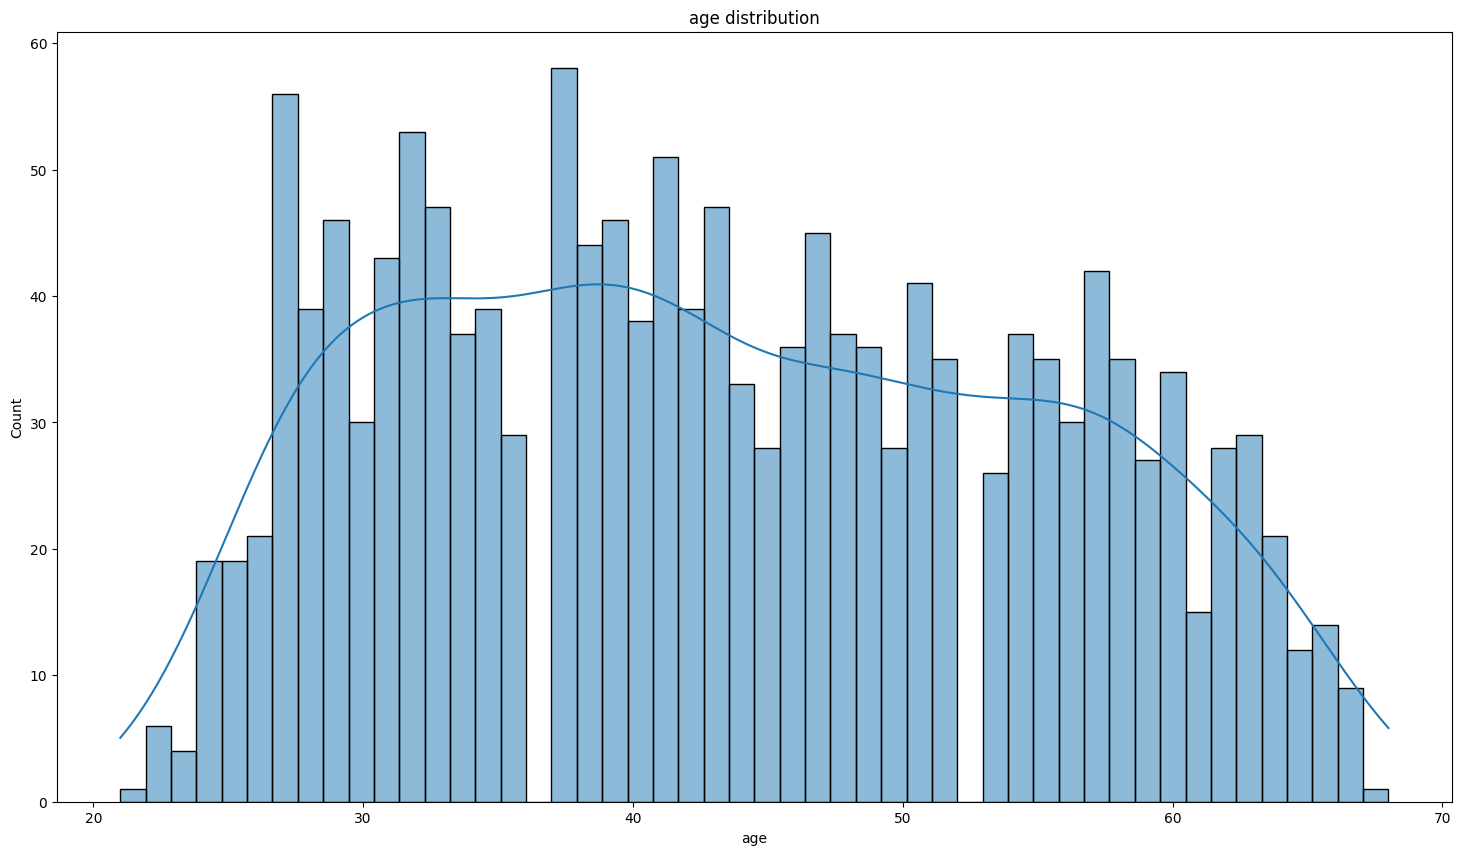

In [ ]:
hist_plot('age')

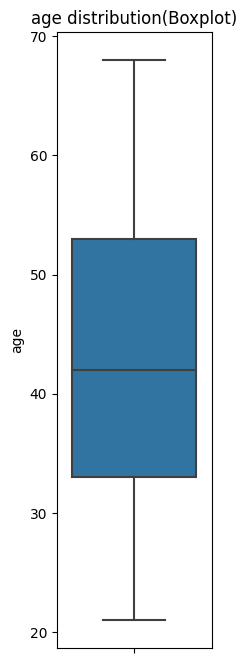

In [ ]:
box_plot('age')

**No outliers**

**Almost normal distribution**

# **Marital_status**

In [ ]:
gen_info("Marital_status")

Description:
count        1548
unique          5
top       Married
freq         1049
Name: Marital_status, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
                      value_count  frequency(%)
Married                      1049     67.764858
Single / not married          227     14.664083
Civil marriage                101      6.524548
Separated                      96      6.201550
Widow                          75      4.844961


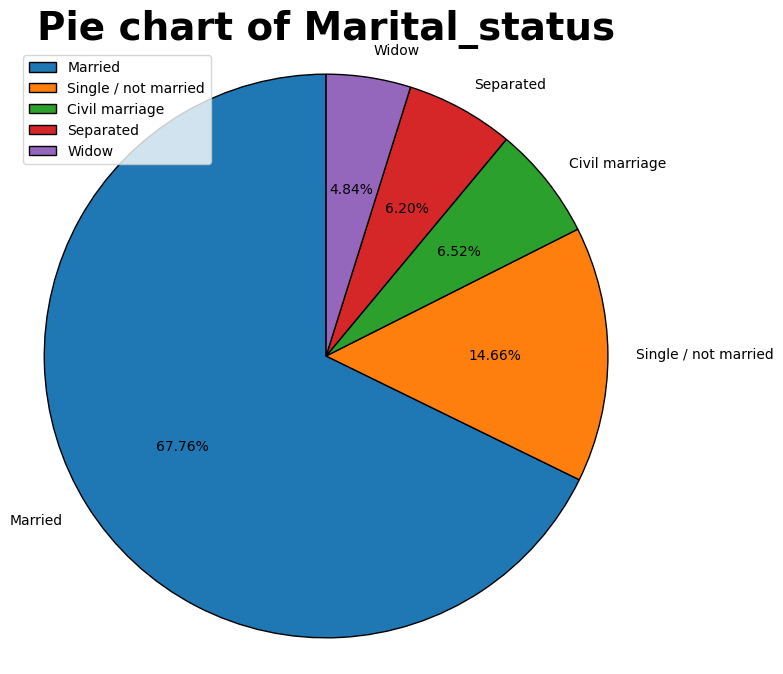

In [ ]:
pie_plot("Marital_status")

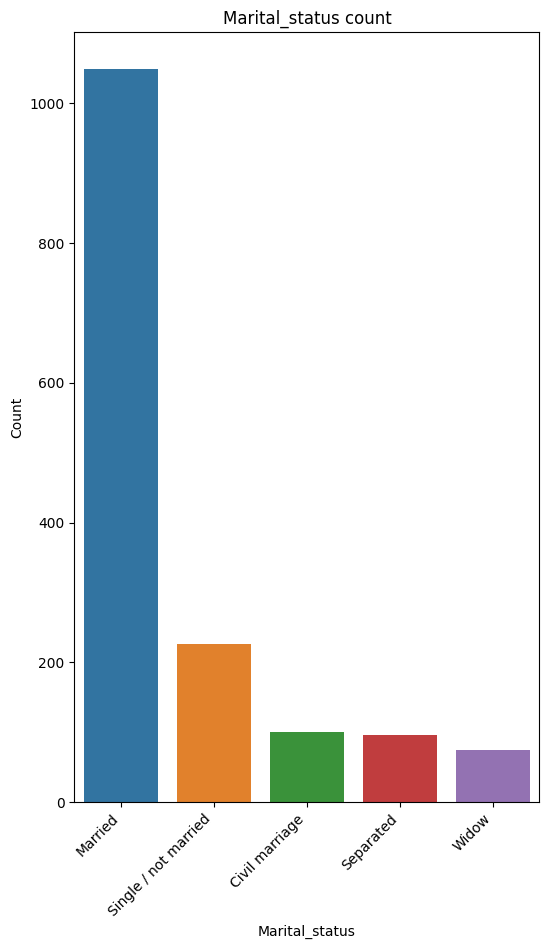

In [ ]:
bar_plot("Marital_status")

# **Majority of the applicants are married**

# **Family members**

In [ ]:
gen_info("Family_Members")

Description:
count    1548.000000
mean        2.161499
std         0.947772
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max        15.000000
Name: Family_Members, dtype: float64
**************************************************
Object type:
int64
**************************************************
Value count:
    value_count  frequency(%)
2           802     51.808786
1           334     21.576227
3           268     17.312661
4           127      8.204134
5            15      0.968992
6             1      0.064599
15            1      0.064599


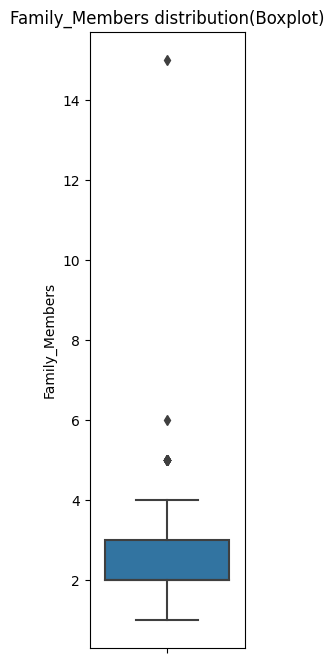

In [ ]:
box_plot("Family_Members")

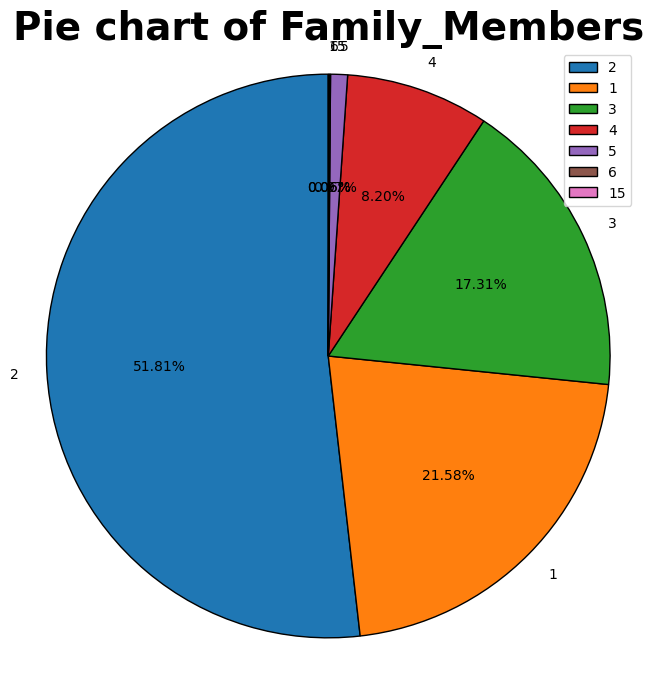

In [ ]:
pie_plot("Family_Members")

**51% of applicants having 2 members in their family**

**73% of applicants having <=2 members in their family**

# **Children**

In [ ]:
gen_info("children")

Description:
count    1548.000000
mean        0.412791
std         0.776691
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        14.000000
Name: children, dtype: float64
**************************************************
Object type:
int64
**************************************************
Value count:
    value_count  frequency(%)
0          1091     70.478036
1           305     19.702842
2           134      8.656331
3            16      1.033592
4             1      0.064599
14            1      0.064599


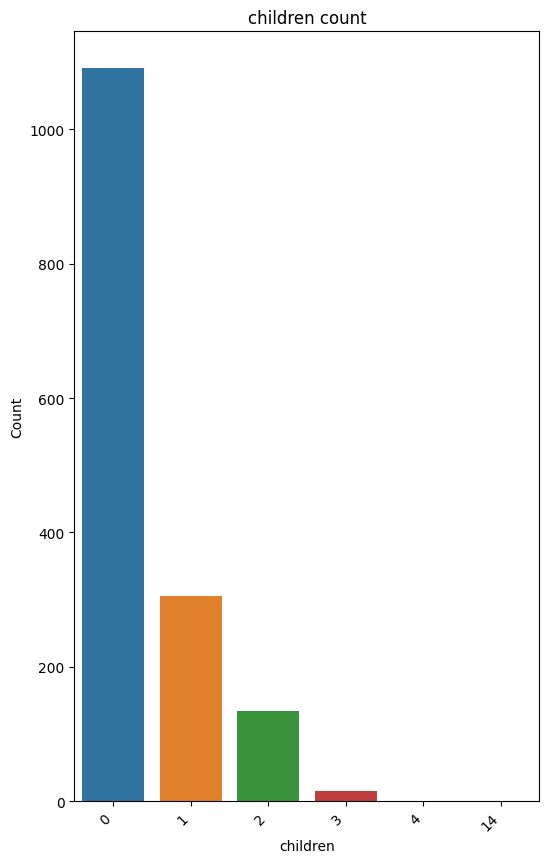

In [ ]:
bar_plot("children")

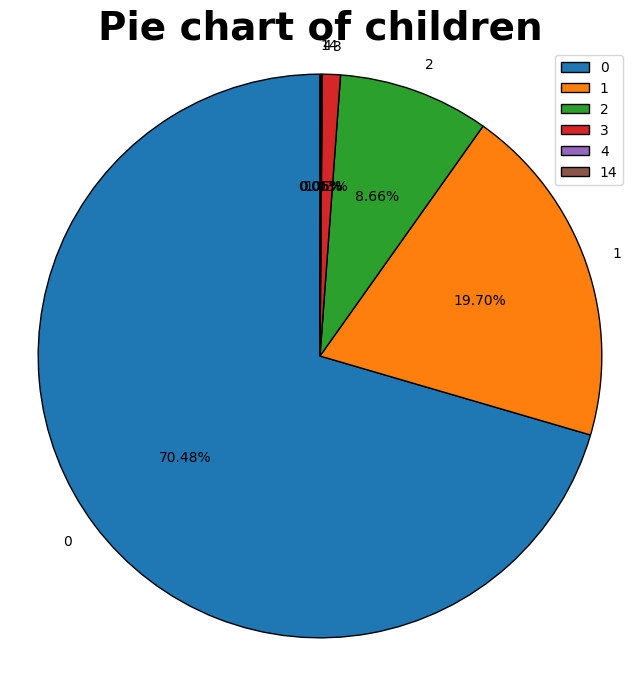

In [ ]:
pie_plot("children")

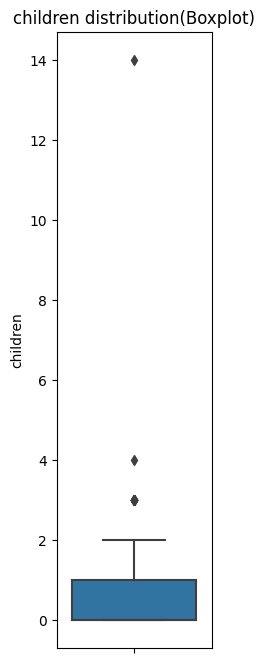

In [ ]:
box_plot("children")

(70%)most applicants don't have a child.

90% of applicants having 1 child or no children

3 outliers in the data.


# **Housing type**

In [ ]:
gen_info("Housing_type")

Description:
count                  1548
unique                    6
top       House / apartment
freq                   1380
Name: Housing_type, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
                     value_count  frequency(%)
House / apartment           1380     89.147287
With parents                  80      5.167959
Municipal apartment           53      3.423773
Rented apartment              21      1.356589
Office apartment               9      0.581395
Co-op apartment                5      0.322997


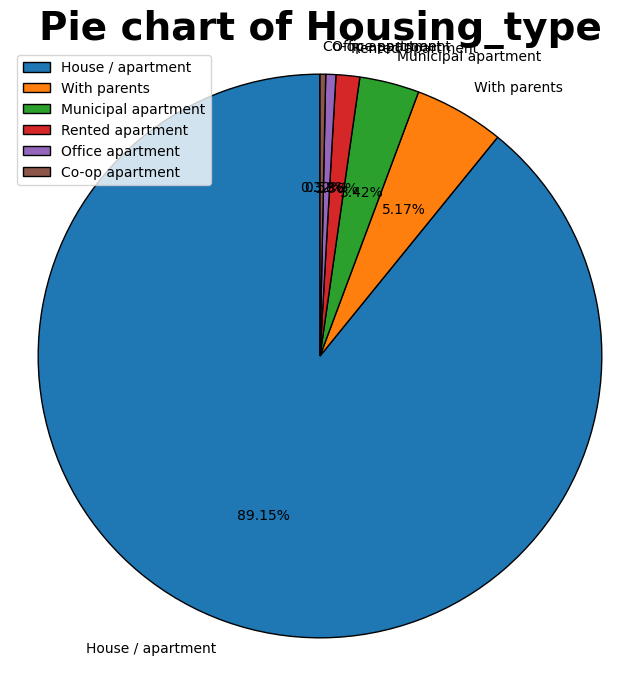

In [ ]:
pie_plot("Housing_type")

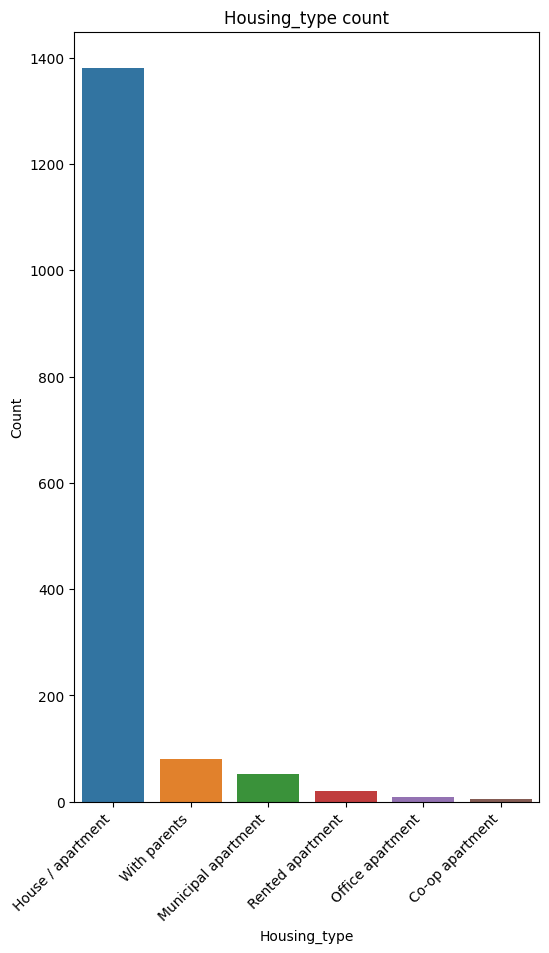

In [ ]:
bar_plot("Housing_type")

# **almost 90 % of the applicants are stays in house/aprtment**

# **Annual income**

In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)


In [ ]:
gen_info("Annual_income")

Description:
count      1525.00
mean     191399.33
std      113253.00
min       33750.00
25%      121500.00
50%      166500.00
75%      225000.00
max     1575000.00
Name: Annual_income, dtype: float64
**************************************************
Object type:
float64
**************************************************
Value count:
           value_count  frequency(%)
135000.00          170         11.15
112500.00          144          9.44
180000.00          137          8.98
157500.00          125          8.20
225000.00          119          7.80
...                ...           ...
119700.00            1          0.07
69372.00             1          0.07
37800.00             1          0.07
333000.00            1          0.07
69750.00             1          0.07

[115 rows x 2 columns]


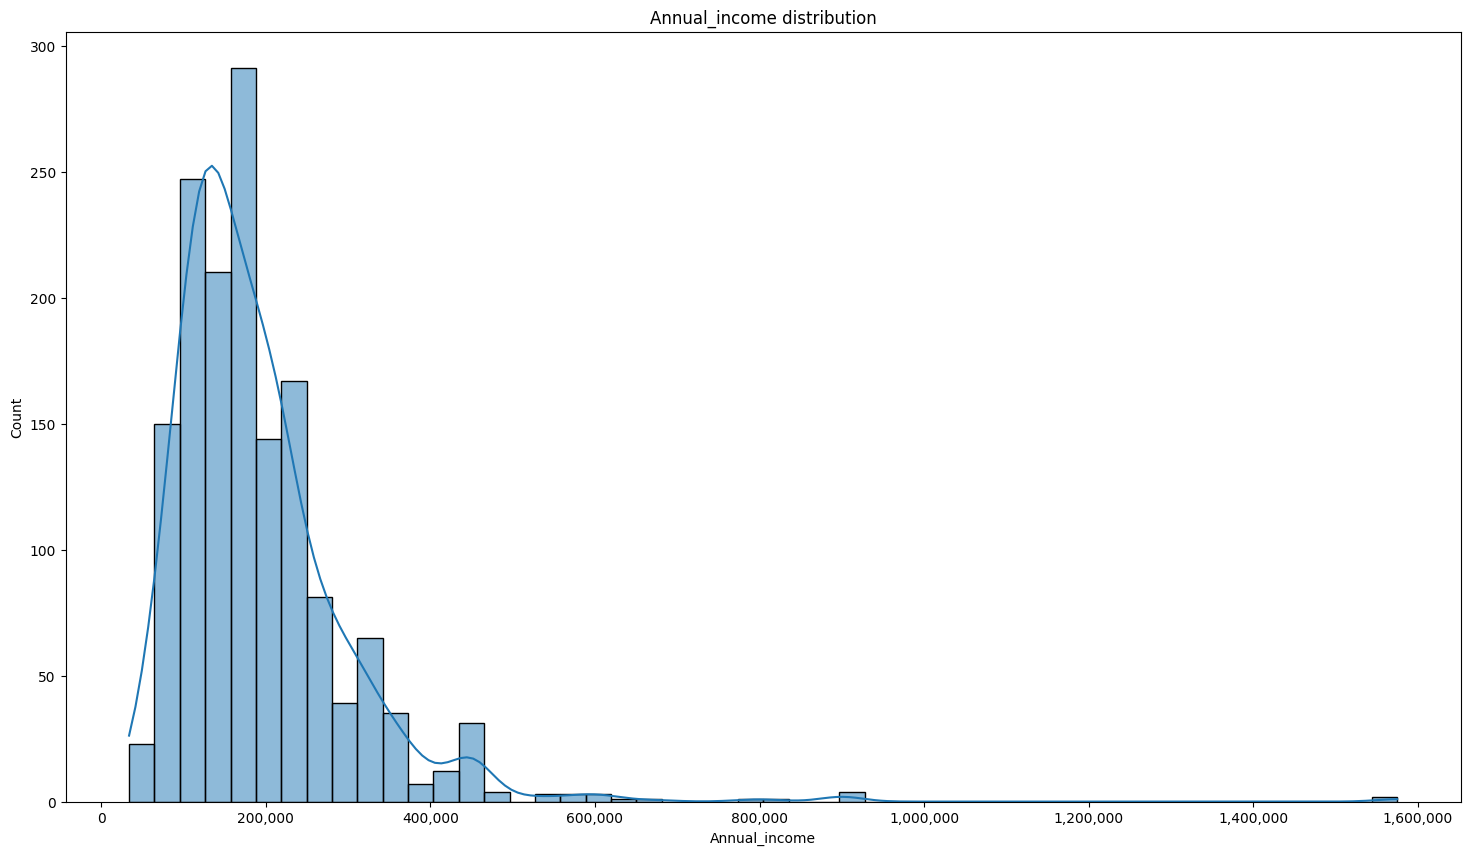

In [ ]:
hist_plot("Annual_income")

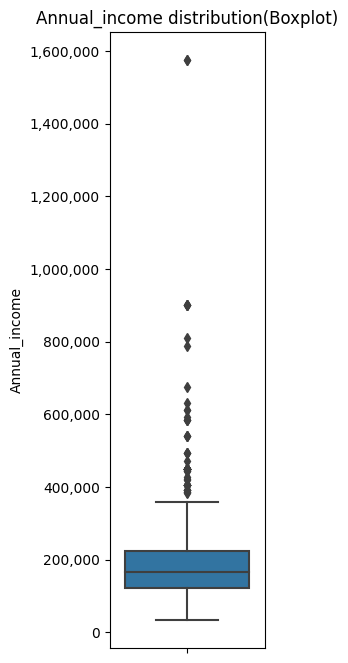

In [ ]:
box_plot("Annual_income")

# **right skewed distribution/positively skewed**

# **many outliers present**

# **mean>median**

# **Type_Occupation**


In [ ]:
gen_info("Type_Occupation")

Description:
count         1060
unique          18
top       Laborers
freq           268
Name: Type_Occupation, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
                       value_count  frequency(%)
Laborers                       268         25.28
Core staff                     174         16.42
Managers                       136         12.83
Sales staff                    122         11.51
Drivers                         86          8.11
High skill tech staff           65          6.13
Medicine staff                  50          4.72
Accountants                     44          4.15
Security staff                  25          2.36
Cleaning staff                  22          2.08
Cooking staff                   21          1.98
Private service staff           17          1.60
Secretaries                      9          0.85
Low-skill Laborers               9          0.85
Wait

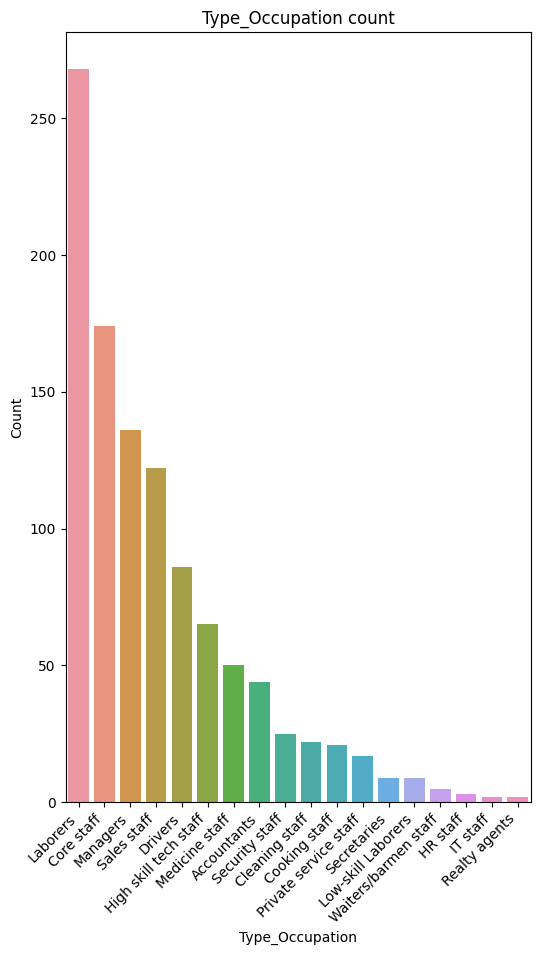

In [ ]:
bar_plot("Type_Occupation")

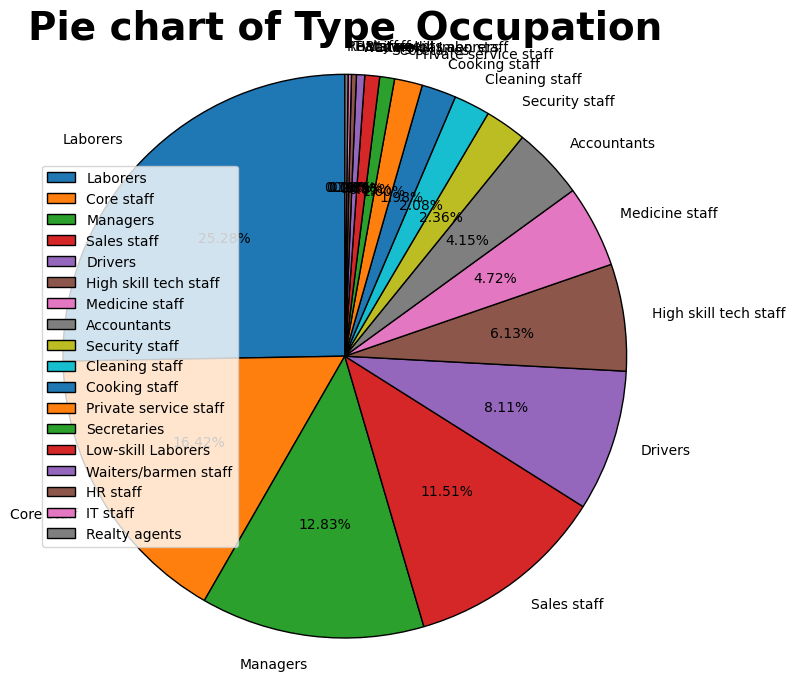

In [ ]:
pie_plot("Type_Occupation")

In [ ]:
print('The percentage of missing rows is {:.2f} %'.format(c['Type_Occupation'].isnull().sum() * 100 / c.shape[0]))

The percentage of missing rows is 31.52 %


25% is of type labourers.
16.5% is of core staff.
11%-sales staff.
8%-drivers

**60% of applicants are minor level employees**

# **Type_Income**

In [ ]:
gen_info("Type_Income")

Description:
count        1548
unique          4
top       Working
freq          798
Name: Type_Income, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
                      value_count  frequency(%)
Working                       798         51.55
Commercial associate          365         23.58
Pensioner                     269         17.38
State servant                 116          7.49


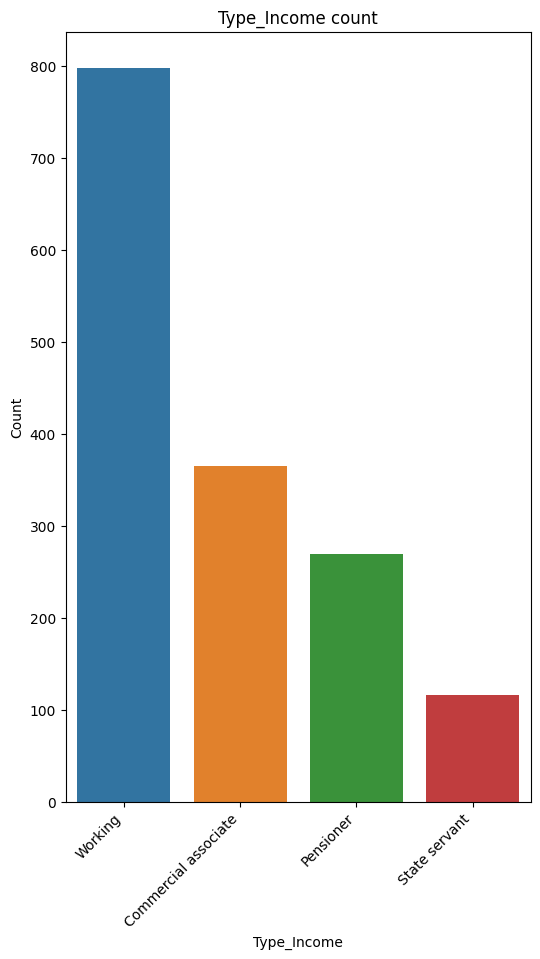

In [ ]:
bar_plot("Type_Income")

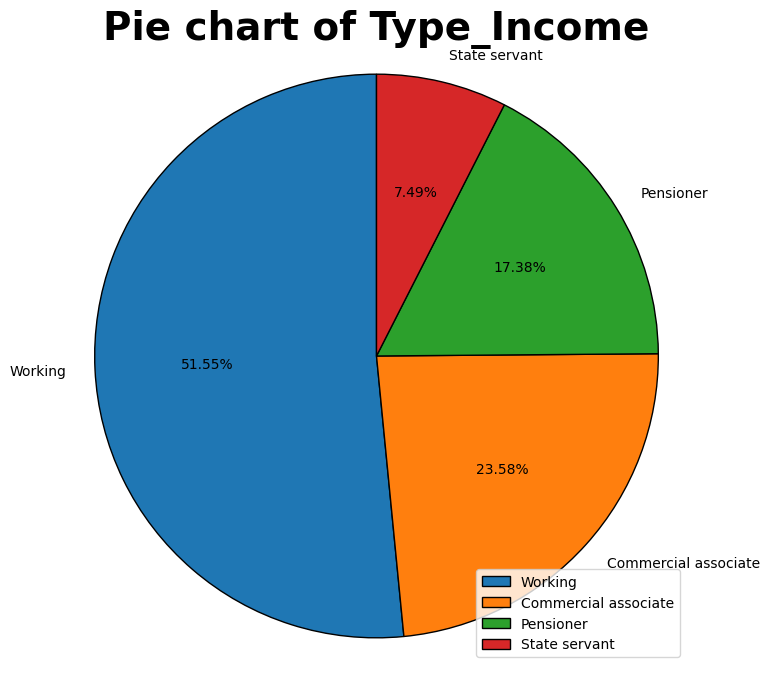

In [ ]:
pie_plot("Type_Income")

most applicants are working followed by commercial associates.

applicants who are not working are pensioners are 17.3%.

# **Education**

In [ ]:
gen_info("EDUCATION")


Description:
count                              1548
unique                                5
top       Secondary / secondary special
freq                               1031
Name: EDUCATION, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
                               value_count  frequency(%)
Secondary / secondary special         1031         66.60
Higher education                       426         27.52
Incomplete higher                       68          4.39
Lower secondary                         21          1.36
Academic degree                          2          0.13


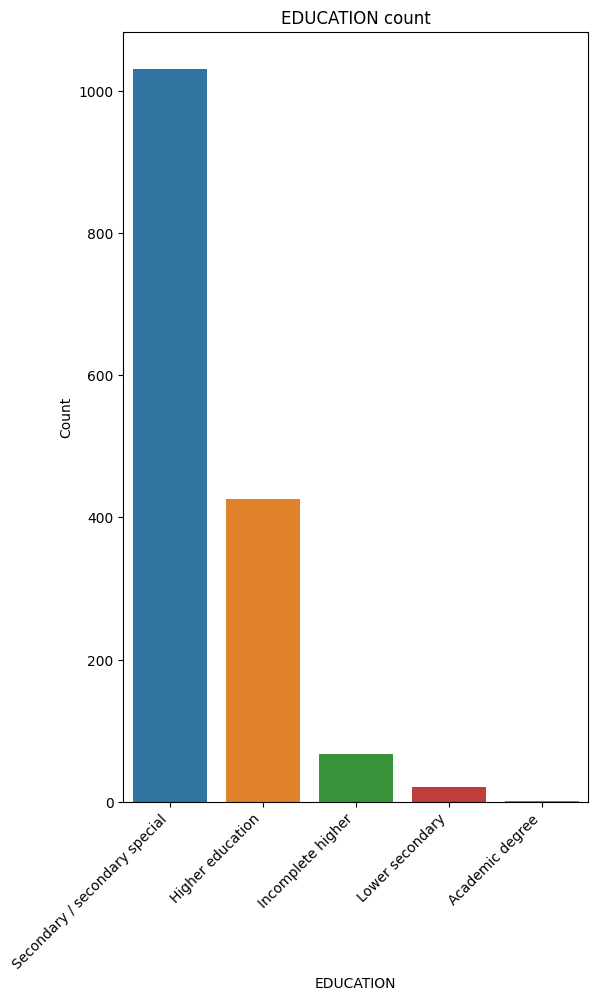

In [ ]:
bar_plot("EDUCATION")

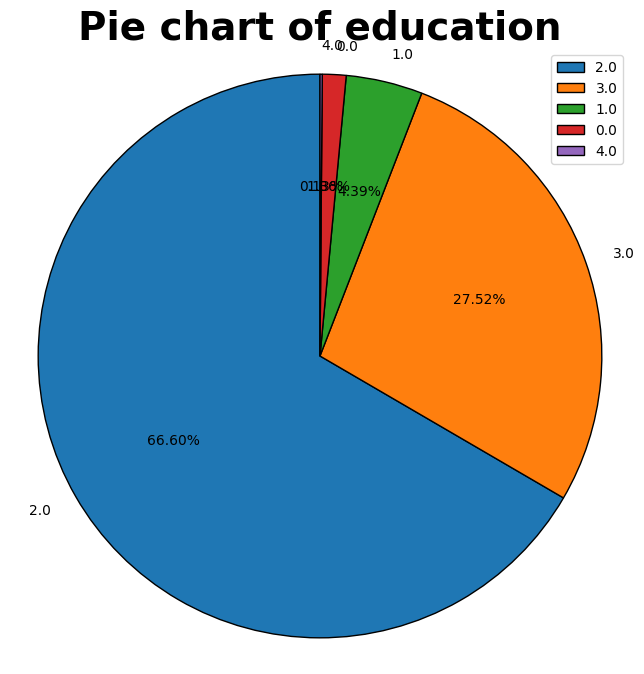

In [ ]:
pie_plot("education")

# **MAJORITY OF THE APPLICANTS ARE DIDN'T COMPLETE HIGHER EDUCATION.**

# **Employed years**

In [ ]:
gen_info("employed_years")

Description:
count   1548.00
mean     174.10
std      371.65
min        0.00
25%        3.00
50%        6.00
75%       16.00
max      999.00
Name: employed_years, dtype: float64
**************************************************
Object type:
float64
**************************************************
Value count:
        value_count  frequency(%)
999.00          261         16.86
1.00            149          9.63
4.00            131          8.46
2.00            113          7.30
3.00            109          7.04
6.00            107          6.91
0.00            105          6.78
5.00             83          5.36
9.00             66          4.26
8.00             64          4.13
7.00             56          3.62
10.00            50          3.23
12.00            27          1.74
14.00            27          1.74
11.00            25          1.61
13.00            21          1.36
15.00            20          1.29
18.00            19          1.23
20.00            16          1.03
22.00 

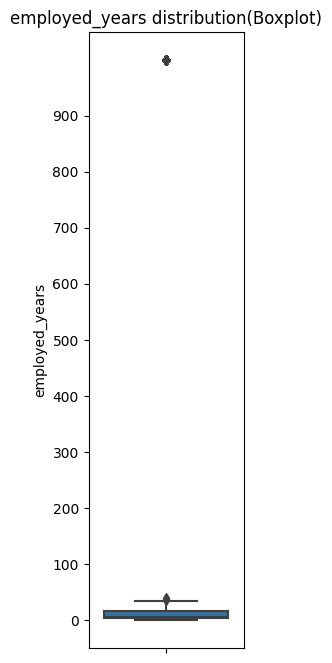

In [ ]:
box_plot("employed_years")

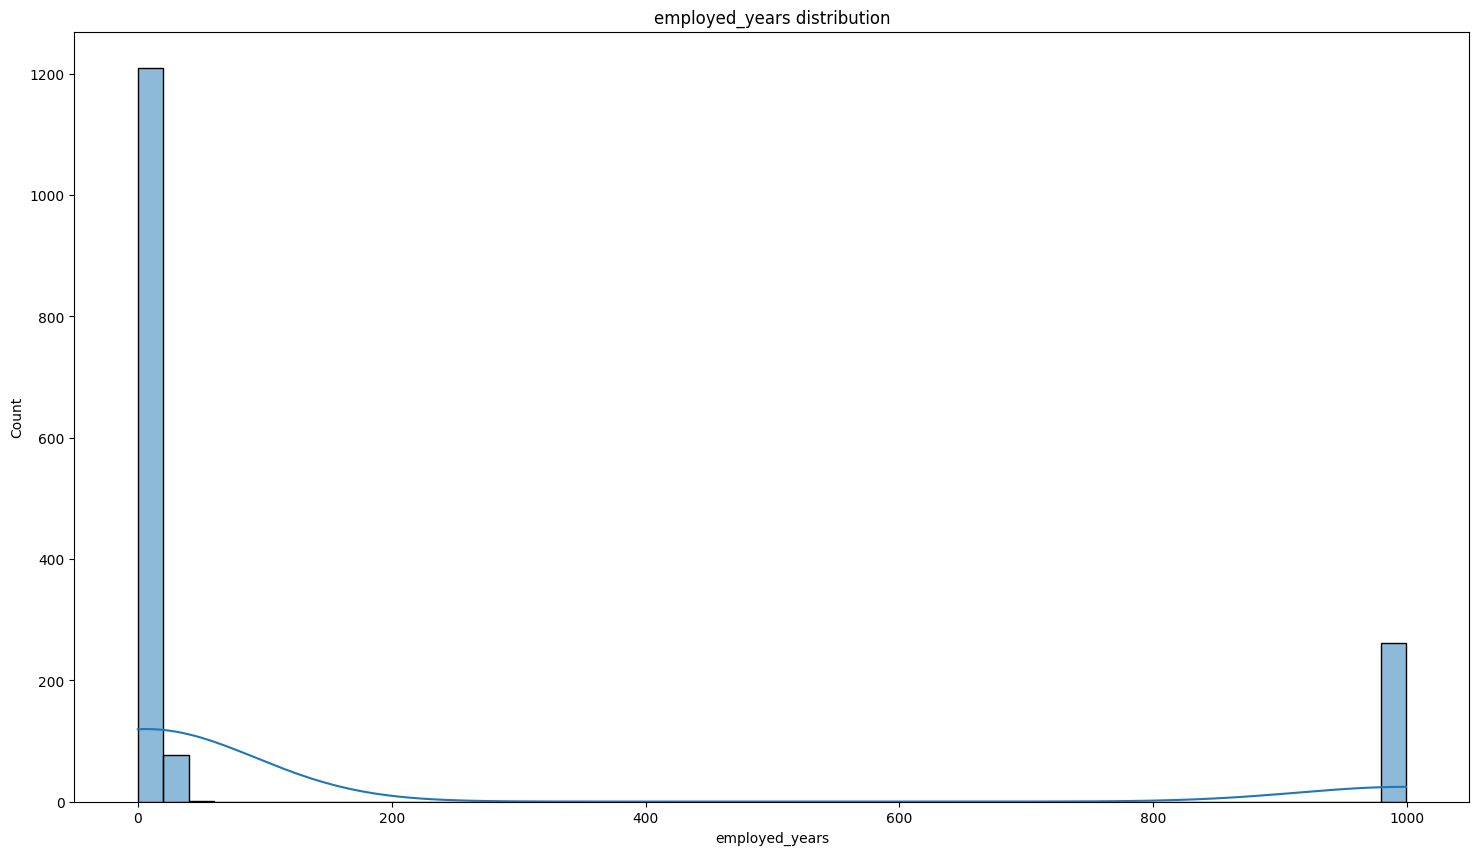

In [ ]:
hist_plot("employed_years")

OUTLIERS PRESENT.

OUTLIERS RANGE IS VERY LARGE.

6 YEARS--THE AVG YEARS OF EMPLOYED

# **Car_Owner**

In [ ]:
gen_info('Car_Owner')

Description:
count     1548
unique       2
top          N
freq       924
Name: Car_Owner, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
   value_count  frequency(%)
N          924         59.69
Y          624         40.31


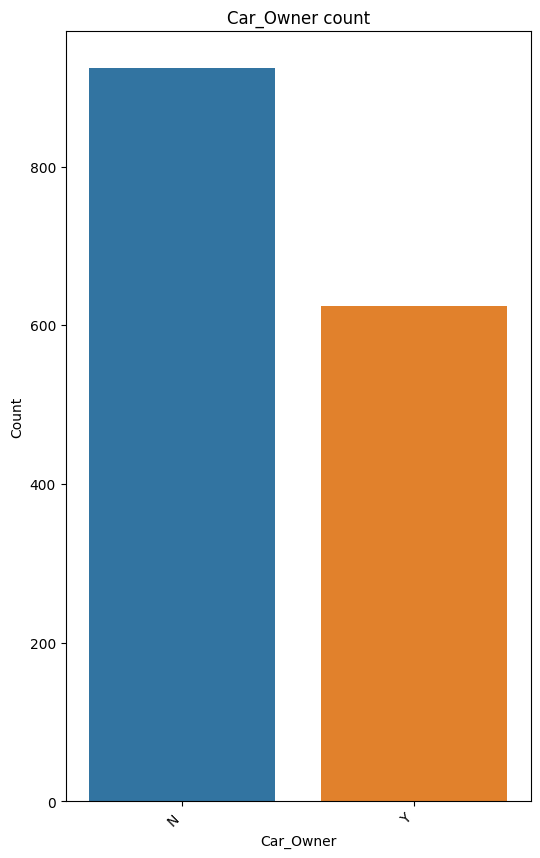

In [ ]:
bar_plot("Car_Owner")

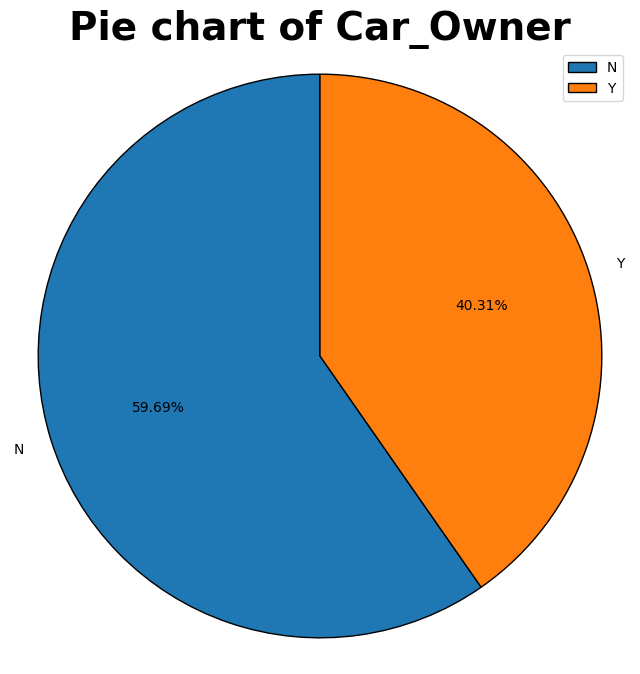

In [ ]:
pie_plot("Car_Owner")

# **60% of applicants dont own a car**

# **Property-Owner**

In [ ]:
gen_info("property_owner")

Description:
count     1548
unique       2
top          Y
freq      1010
Name: property_owner, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
   value_count  frequency(%)
Y         1010         65.25
N          538         34.75


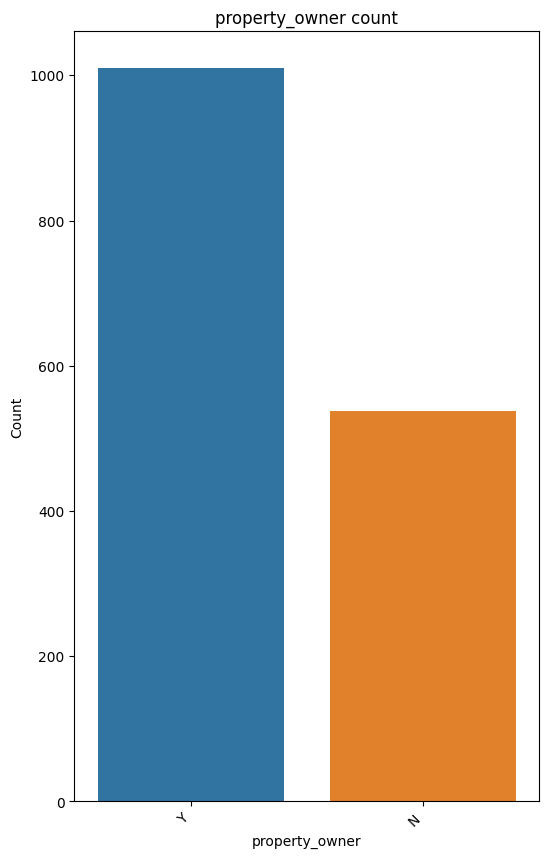

In [ ]:
bar_plot("property_owner")

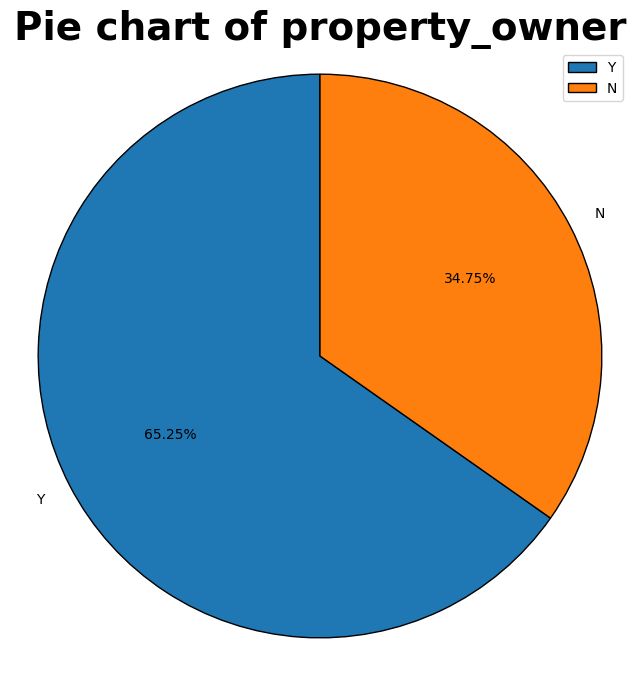

In [ ]:
pie_plot("property_owner")

# **65% of applicants owns a property**

# **WORK_PHONE**

In [ ]:
gen_info("Work_Phone")

Description:
count   1548.00
mean       0.21
std        0.41
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        1.00
Name: Work_Phone, dtype: float64
**************************************************
Object type:
int64
**************************************************
Value count:
   value_count  frequency(%)
0         1226         79.20
1          322         20.80


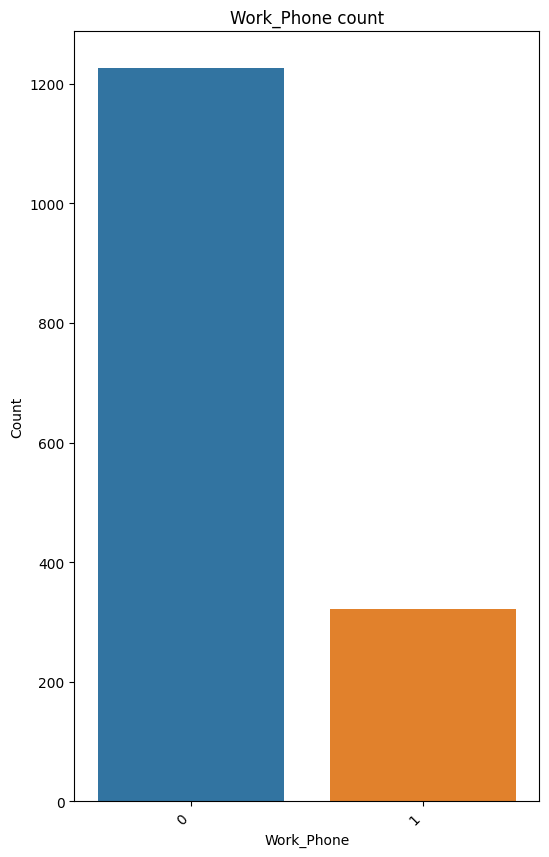

In [ ]:
bar_plot("Work_Phone")

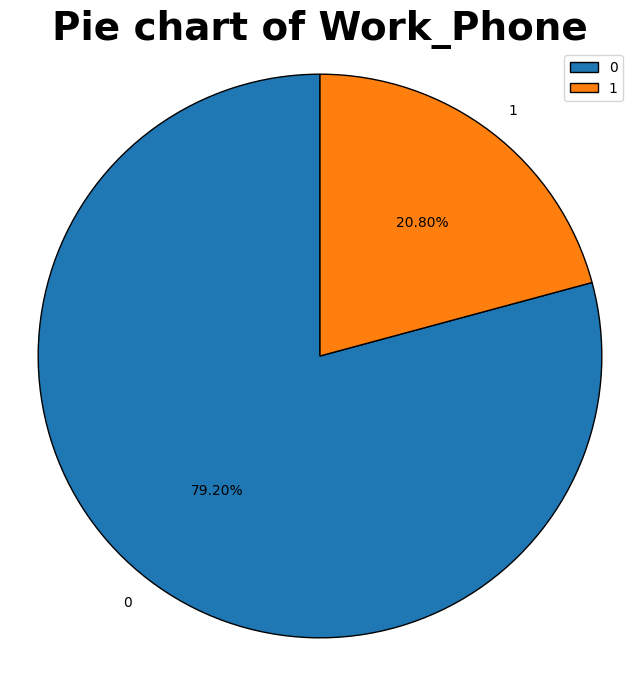

In [ ]:
pie_plot("Work_Phone")

# **80% of applicnats dont have work phone**

# **Mobile_phone**

In [ ]:
gen_info("Mobile_phone")

Description:
count   1548.00
mean       1.00
std        0.00
min        1.00
25%        1.00
50%        1.00
75%        1.00
max        1.00
Name: Mobile_phone, dtype: float64
**************************************************
Object type:
int64
**************************************************
Value count:
   value_count  frequency(%)
1         1548        100.00


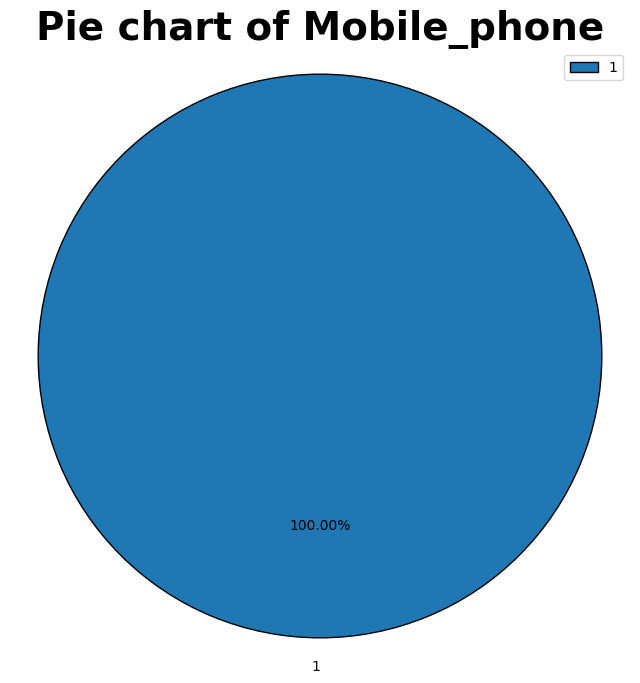

In [ ]:
pie_plot("Mobile_phone")

# **All applicants having mobile phone**

# **Phone**

In [ ]:
gen_info("Phone")

Description:
count   1548.00
mean       0.31
std        0.46
min        0.00
25%        0.00
50%        0.00
75%        1.00
max        1.00
Name: Phone, dtype: float64
**************************************************
Object type:
int64
**************************************************
Value count:
   value_count  frequency(%)
0         1069         69.06
1          479         30.94


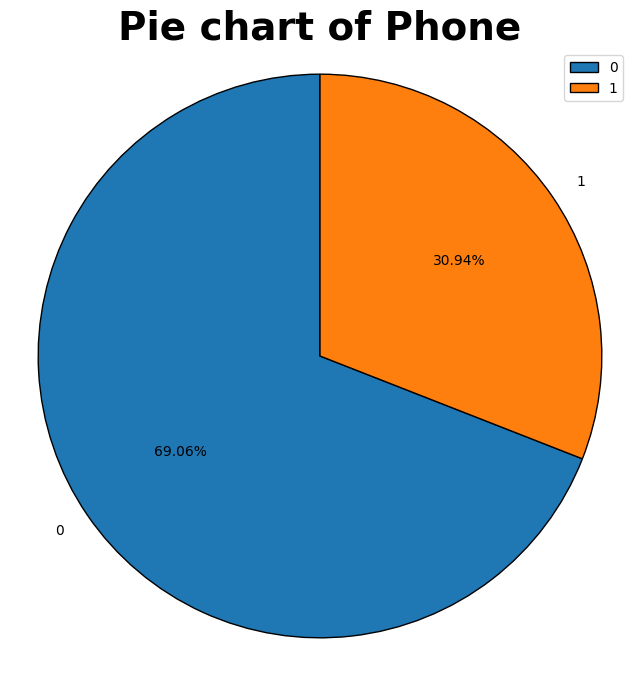

In [ ]:
pie_plot("Phone")

# **70% of appliants not having phone**

# **Email**

In [ ]:
gen_info("EMAIL_ID")

Description:
count   1548.00
mean       0.09
std        0.29
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        1.00
Name: EMAIL_ID, dtype: float64
**************************************************
Object type:
int64
**************************************************
Value count:
   value_count  frequency(%)
0         1405         90.76
1          143          9.24


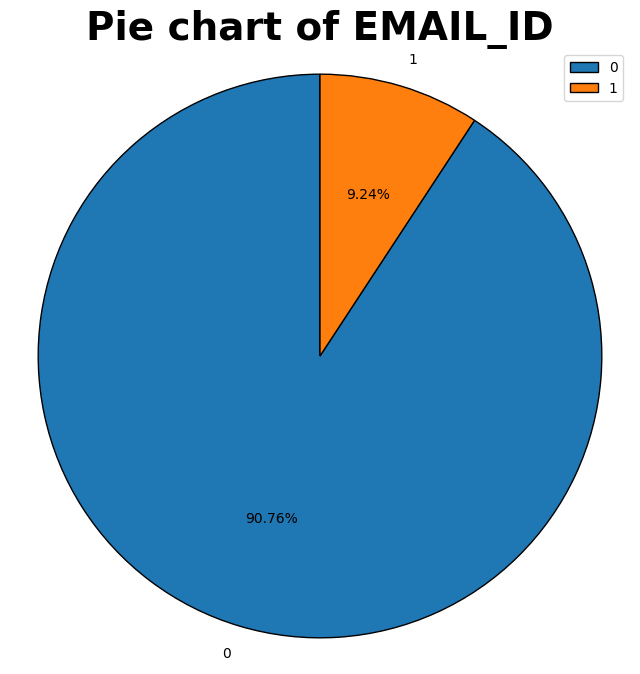

In [ ]:
pie_plot("EMAIL_ID")

# **90% of applicants not having email id's.**

# **IS_HIGHRISK __(TARGET_VARIABLE)**

In [ ]:
gen_info("is_highrisk")

Description:
count   1548.00
mean       0.11
std        0.32
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        1.00
Name: is_highrisk, dtype: float64
**************************************************
Object type:
int64
**************************************************
Value count:
   value_count  frequency(%)
0         1373         88.70
1          175         11.30


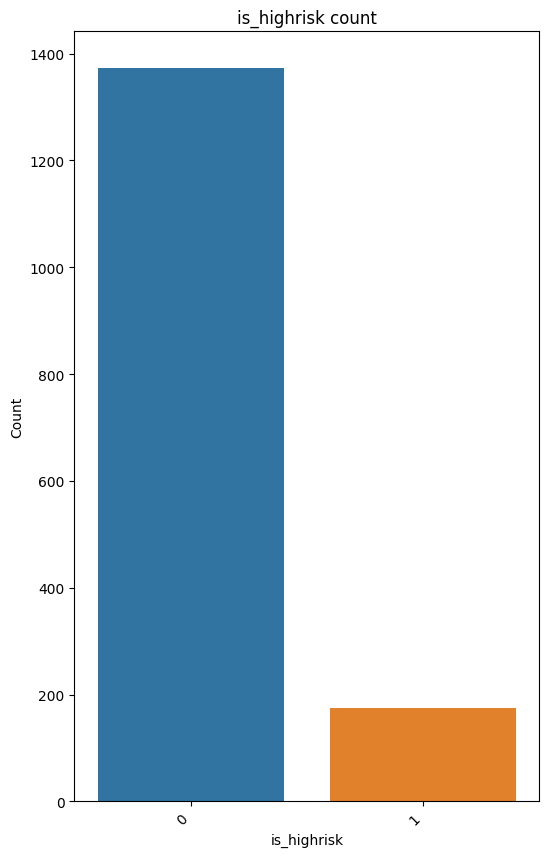

In [ ]:
bar_plot("is_highrisk")

# **90% of the appliants are not posing high risk, only 10% are at higher risk**

# **BIVARIATE ANALYSIS**

# **age with  high_risk analysis**

age group is almost same in both applicants who are at high risk and who are not at high risk

The youngest applicant is 21 years old while the oldest is 68 years old.

is_highrisk
0   43.23
1   44.87
Name: age, dtype: float64


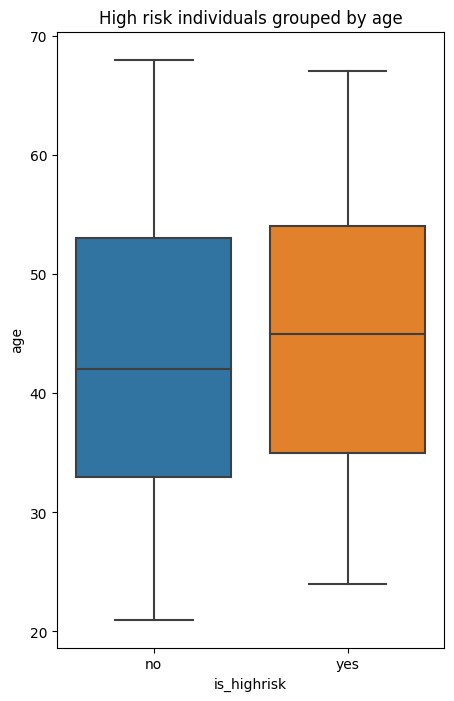

In [ ]:
low_high_risk_box_plot('age')

# **Annual Income**

is_highrisk
0   190309.26
1   200263.47
Name: Annual_income, dtype: float64


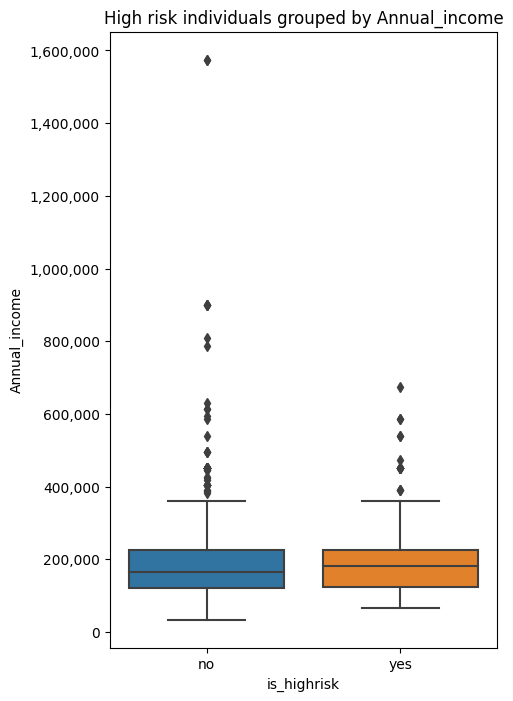

is_highrisk
0   163800.00
1   180000.00
Name: Annual_income, dtype: float64


In [ ]:
low_high_risk_box_plot("Annual_income")
print(c.groupby("is_highrisk")['Annual_income'].median())

Interpretation:

FOR NOT HIGH RISKY CANDIDATES:
The average income is 190309(INCLUDES outliers)
avg income(median)-163800(Ignoring outliers)

We have 1 applicant who makes more than 1000000

This feature is positively skewed

**High risk and low risk applicants have roughly similar income**

# **Employed_years**

is_highrisk
0   6.00
1   4.00
Name: employed_years, dtype: float64


([<matplotlib.axis.XTick at 0x79517b8a18a0>,
 [Text(0, 0, 'no'), Text(1, 0, 'yes')])

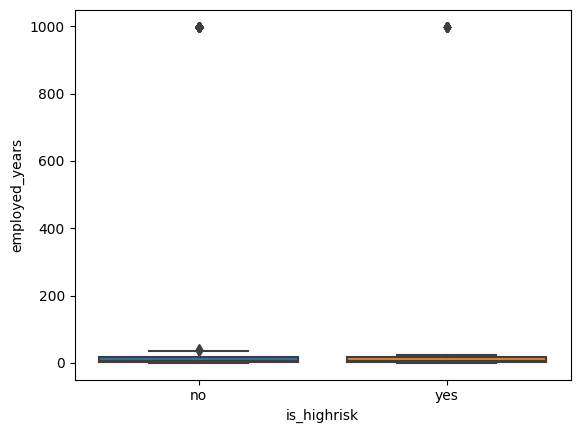

In [ ]:
import seaborn as sns
print(c.groupby("is_highrisk")['employed_years'].median())
sns.boxplot(y=c['employed_years'],x=c['is_highrisk'])
plt.xticks(ticks=[0,1],labels=['no','yes'])

**Applicants with low experience are high at risk-- 4years experience in high risk applicants**

**High experience applicants are low at risk-- 6 years experience in low risk applicants**

# **Scatter plots__ numerical vs numerical features**

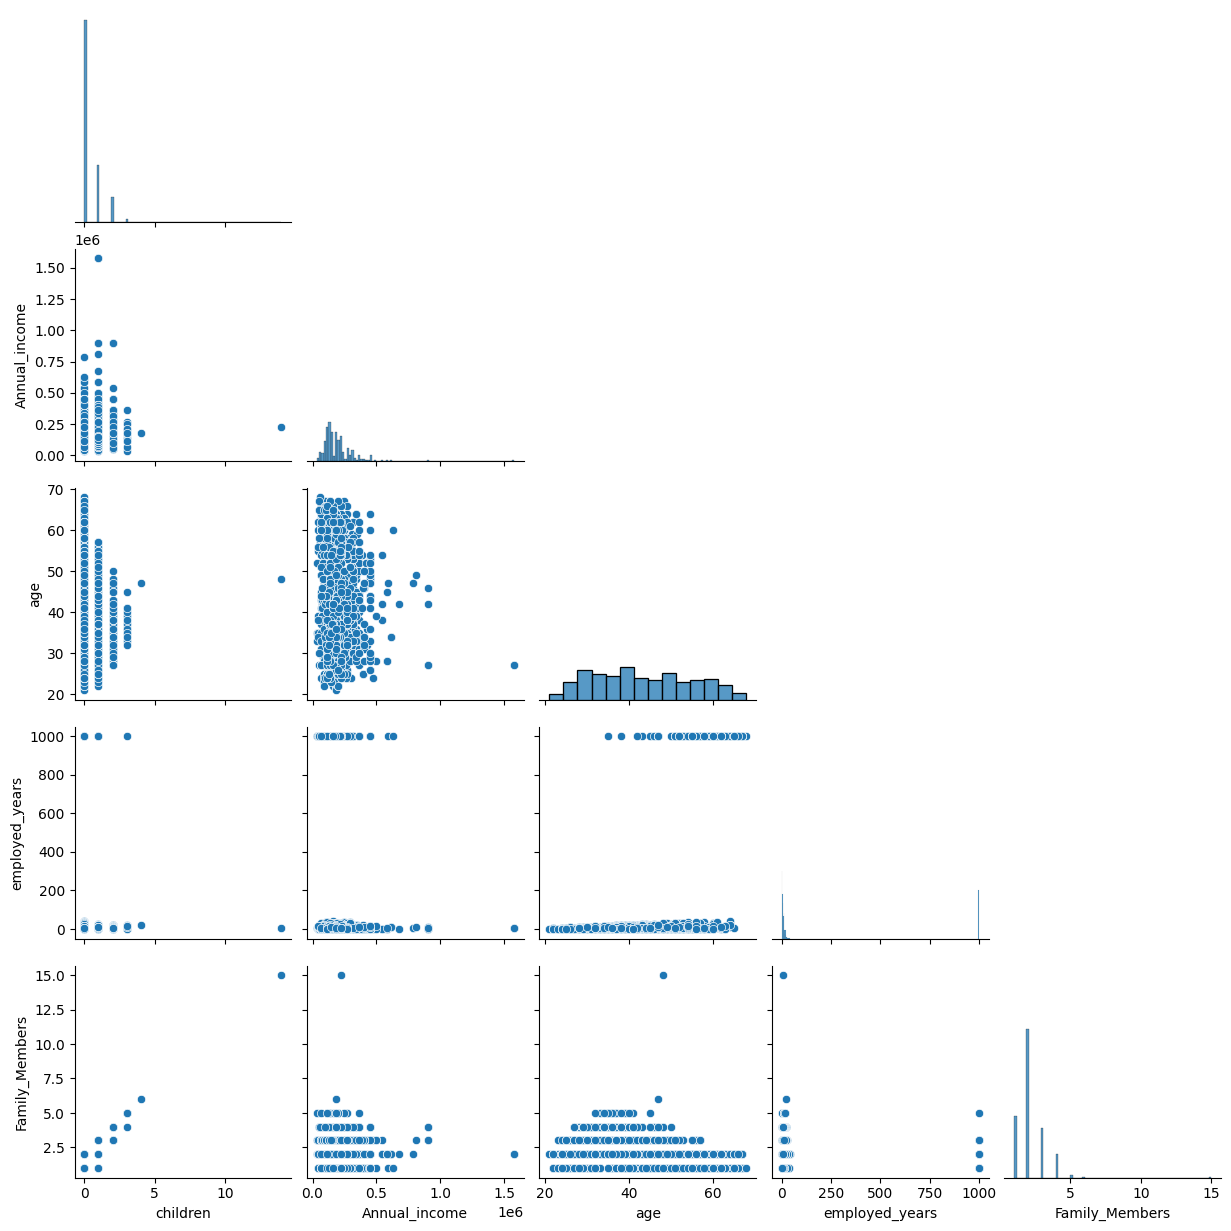

In [ ]:
sns.pairplot(c.drop(['Ind_ID','Mobile_phone','Work_Phone','Phone','EMAIL_ID','is_highrisk'],axis=1),corner=True)
plt.show()

-positive linear correlation between family_members and children features.

-Annual income high in applicants having children 0 or 1.

-Annual income high in applicants with family 0 to 2.

-slight positive relation between employed_years and age features.It makes sense as age increases employed experience also increases.

# **children vs family_members**

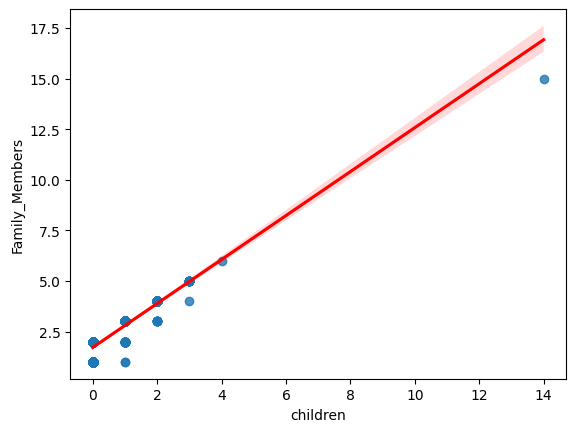

In [ ]:
sns.regplot(x='children',y='Family_Members',data=c,line_kws={'color': 'red'})
plt.show()

# **more children applicant had, the more family members added**

# **employed years vs age**

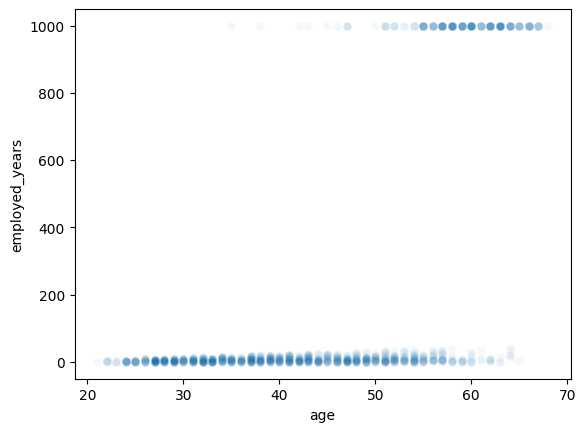

In [ ]:
sns.scatterplot(y=c['employed_years'],x=c['age'],alpha=.05)
# change the frequency of the x-axis and y-axis labels
#plt.xticks(np.arange(0, c['employed_years'].max(), 2.5))
#plt.yticks(np.arange(20,c['age'].max(), 5))
plt.show()

From the age of 35 to 55, as the age increases the employed years also increasing, but we cant notice clearly as there are outliers in employed years
with large range.

# **Correlation analysis**

<ipython-input-117-6fb2ee7d6a4c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cc_train = c.drop(['Mobile_phone'],axis=1).corr()


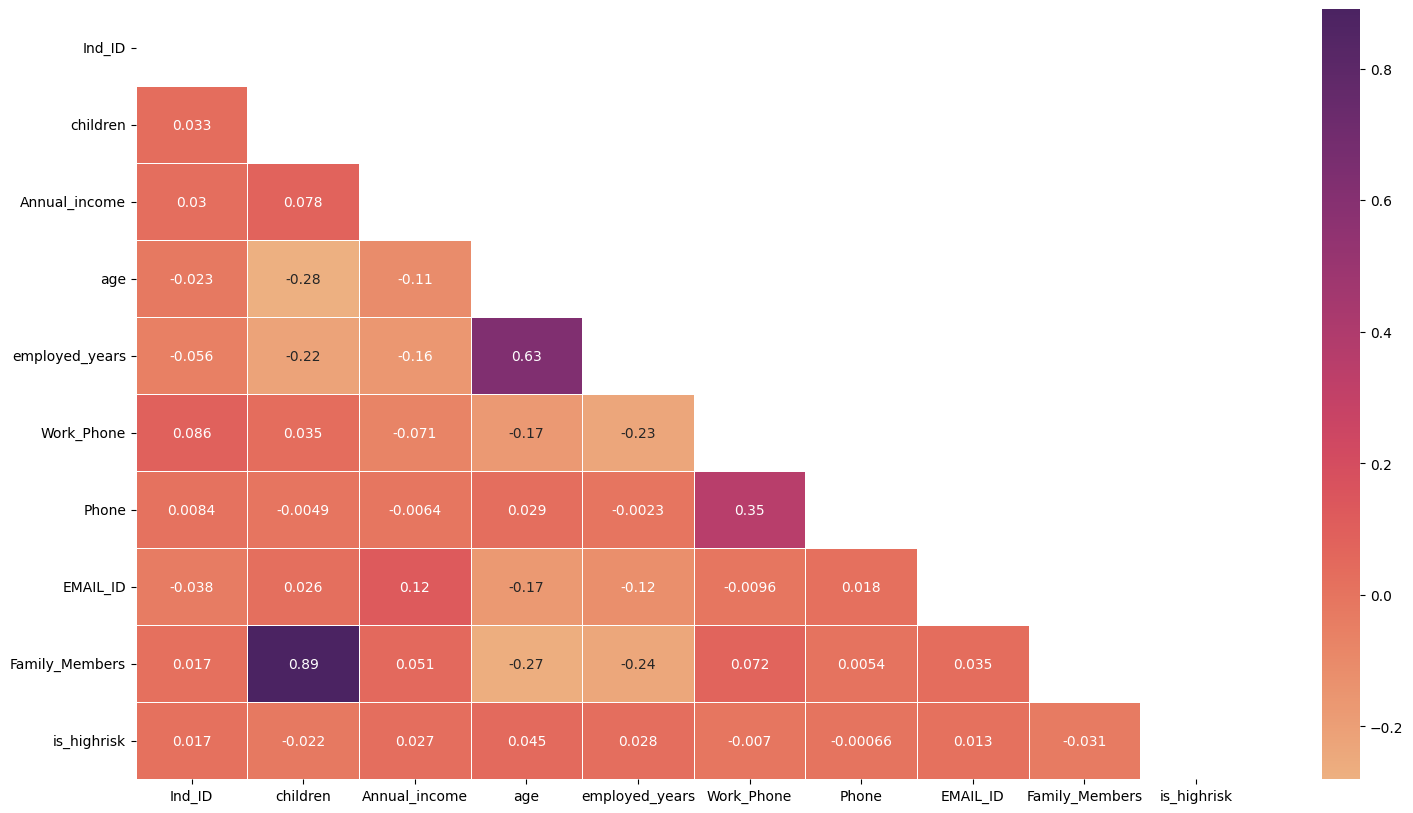

In [ ]:
# correlation analysis with heatmap, after dropping the has a mobile phone with the target feature as int
cc_train = c.drop(['Mobile_phone'],axis=1).corr()
# Get the lower triangle of the correlation matrix
# Generate a mask for the upper triangle
mask = np.zeros_like(cc_train, dtype='bool')
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(18,10))
# seaborn heatmap
sns.heatmap(cc_train, annot=True, cmap='flare',mask=mask, linewidths=.5)
# plot the heatmap
plt.show()

Age, employed_years, Annual_income POSITIVELY influence the label feature, whether the applicant is at high risk or not.

3 features are correlated to each other:

-Highly stong correlation b/n family_members and children

-Strong correlation b/n employed years and age features.

-Slightly strong correlation b/n phone and work_phone features

NEGATIVE CORRELATION B/N:

-AGE AND CHILDREN, AGE AND FAMILY MEMBERS

-EMPLOYED YERAS AND CHILDREN, EMPLOYED YEARS AND FAMILY MEMBERS


# **Finding relation between numerical anad categorical features.(ANOVA test)**

# **AGE VS CATEGORICAL FEATURES**

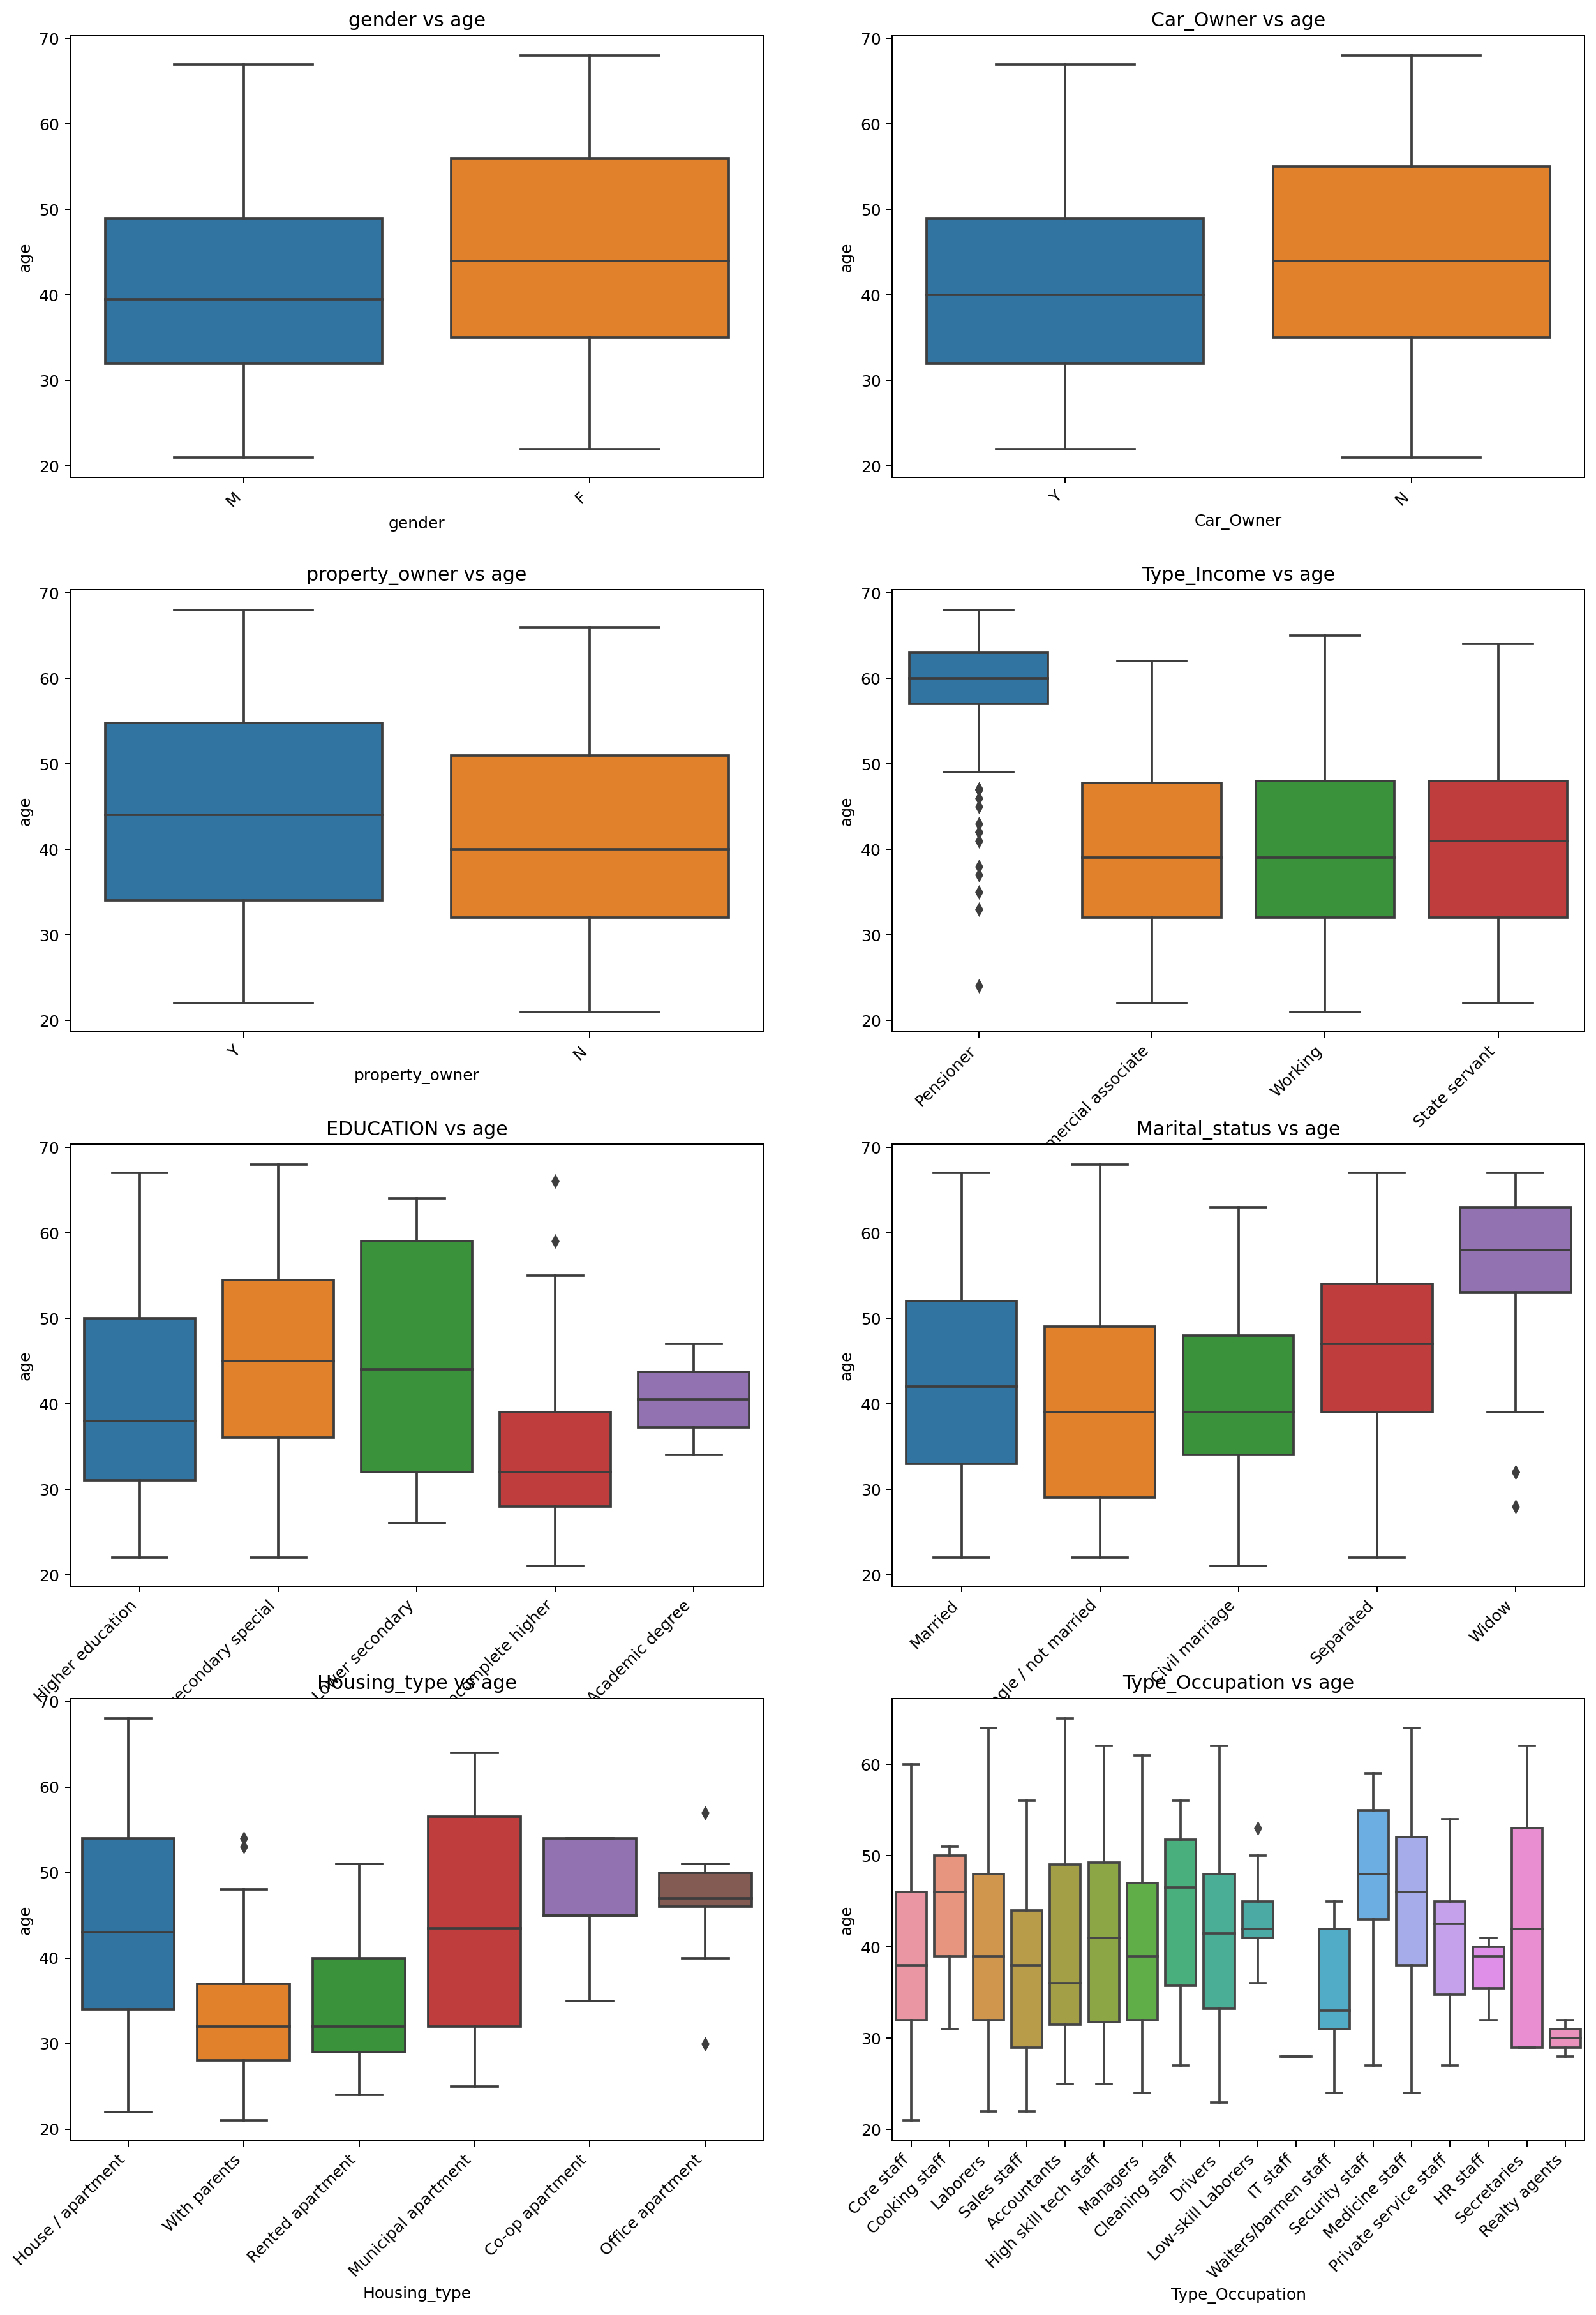

In [ ]:
fig, axes = plt.subplots(4,2,figsize=(15,20),dpi=180)
fig.tight_layout(pad=5.0)
cat_features = ['gender', 'Car_Owner', 'property_owner', 'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type', 'Type_Occupation']
for cat_ft_count, ax in enumerate(axes):
    for row_count in range(4):
        for feat_count in range(2):
            sns.boxplot(ax=axes[row_count,feat_count],x=c[cat_features[cat_ft_count]],y=np.abs(c['age']))
            axes[row_count,feat_count].set_title(cat_features[cat_ft_count] + " vs age")
            plt.sca(axes[row_count,feat_count])
            plt.xticks(rotation=45,ha='right')
            plt.ylabel('age')
            cat_ft_count += 1
    break

Interpretation:

Female applicants are older than their male counterpart.

Applicants who don't own a car tend to be older.

Applicants who own property tend to be older than who dont own.

Some applicants are young pensioners(outliers in pensioners category)

Commercial associate,working,State servant are all of almost equal age category.

Applicants with academic degree are the younger people.

Age of applicants who have completed higher education or secondary special
tend to be much older than others.

Outliers in incomplete higher category-much older applicants.

Widows are older than others, some outliers in widow below age 30.

Applicants who live in house/apartment tend to be much older.
Applicants living with parents are having age less than 50.(some outliers present)
Who live in office/apartment-age group b/n 40 and 52.(shortest age group)

Reality agents and IT staff being the youngest applicants
Accountants,Laborers being much older than other professions.




# **ANNUAL INCOME VS CATEGORICAL FEATURES**

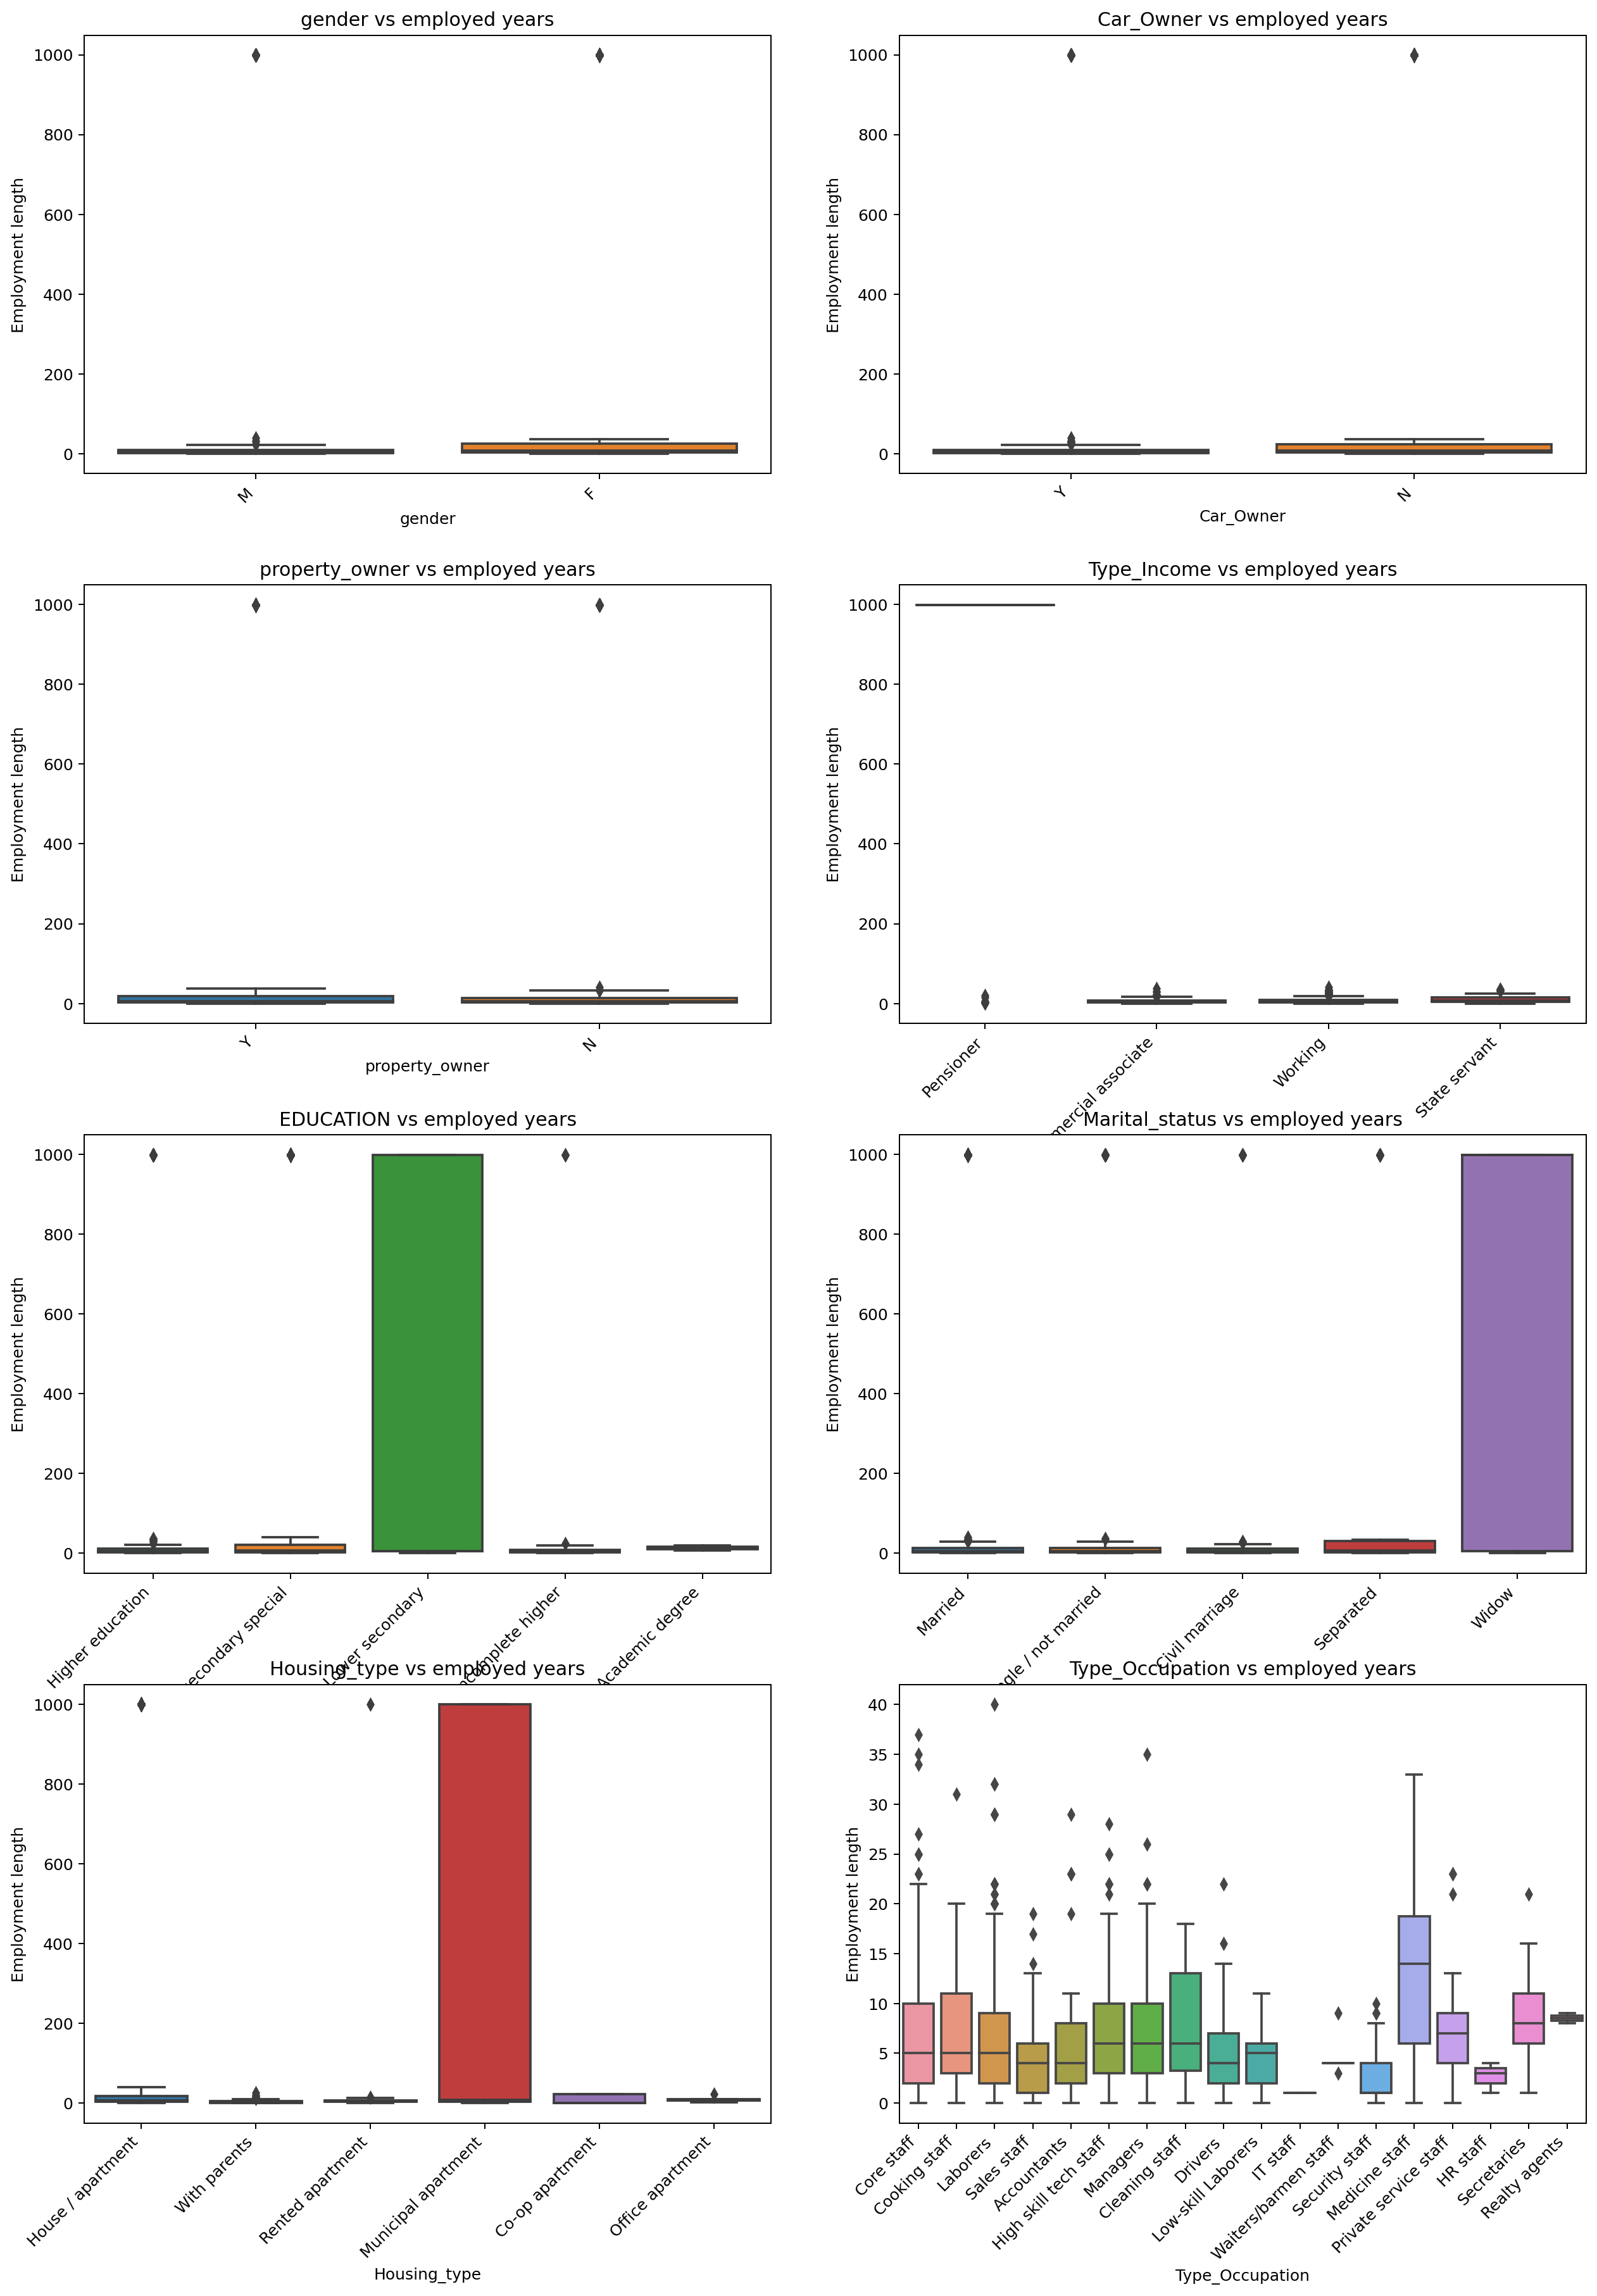

In [ ]:
fig, axes = plt.subplots(4,2,figsize=(15,20),dpi=180)
fig.tight_layout(pad=5.0)

for cat_ft_count, ax in enumerate(axes):
    for row_count in range(4):
        for feat_count in range(2):
            sns.boxplot(ax=axes[row_count,feat_count],x=c[cat_features[cat_ft_count]],y=np.abs(c['employed_years']))
            axes[row_count,feat_count].set_title(cat_features[cat_ft_count] + " vs employed years")
            plt.sca(axes[row_count,feat_count])
            plt.ylabel('Employment length')
            plt.xticks(rotation=45,ha='right')
            cat_ft_count += 1
    break

Females have more employed years than males.

who own a property have more employed years than who doesn't own property.

who doesn't own a car have more employed years than who own a car.

State servants having highest employed years.

Medicine staf having the highest employed years.


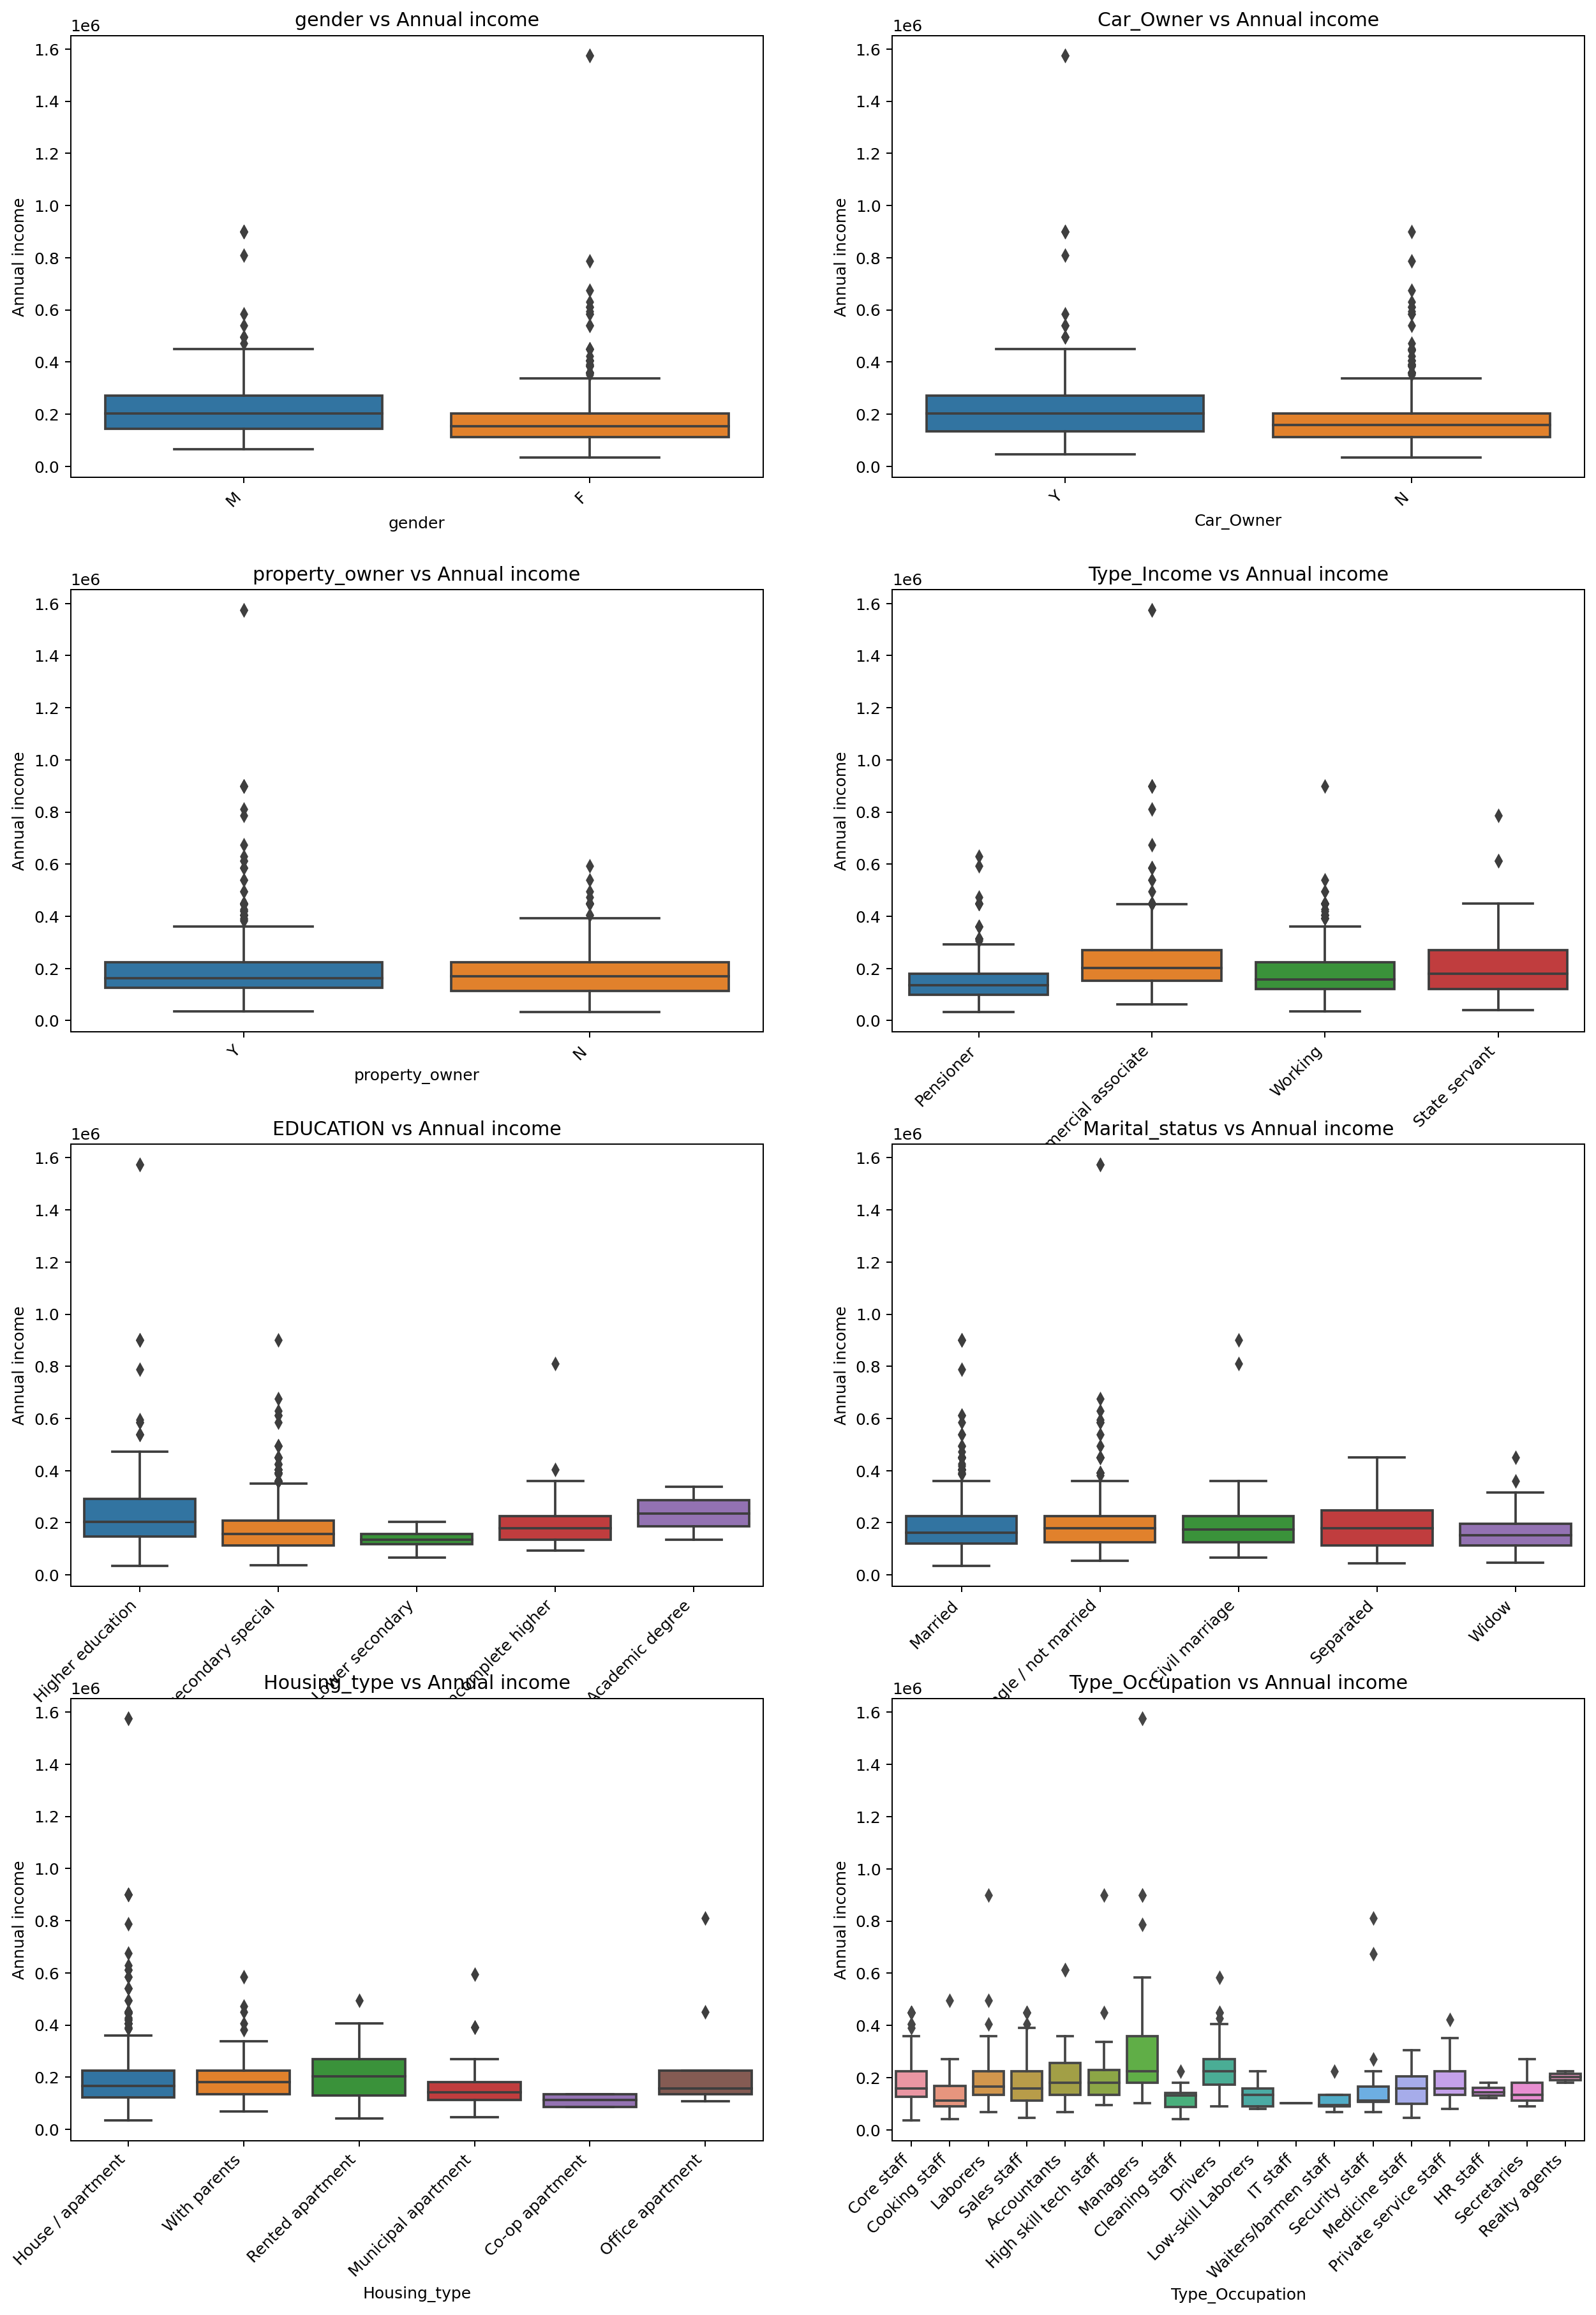

In [ ]:
fig, axes = plt.subplots(4,2,figsize=(15,20),dpi=180)
fig.tight_layout(pad=5.0)

for cat_ft_count, ax in enumerate(axes):
    for row_count in range(4):
        for feat_count in range(2):
            #pd.set_option('display.float_format', lambda x: '%.2f' % x)
            sns.boxplot(ax=axes[row_count,feat_count],x=c[cat_features[cat_ft_count]],y=c['Annual_income'])
            axes[row_count,feat_count].set_title(cat_features[cat_ft_count] + " vs Annual income")
            plt.sca(axes[row_count,feat_count])
            plt.ylabel('Annual income')
            plt.xticks(rotation=45,ha='right')
            #ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
            cat_ft_count += 1
    break

Males having the higher income than the females.

Managers having the highest income levels.


# **CATEGORICAL VS CATEGORICAL FEATURES(CHI SQUARE TEST)**

Null hypothesis: the feature's categories have no effect on the target variable. Alternate hypothesis: one(or more) of the feature categories has a significant effect on the target variable.

In [ ]:
def chi_func(feature):
    # selection row with high risk
    high_risk_ft = c[c['is_highrisk'] == 1][feature]
    high_risk_ft_ct = pd.crosstab(index=high_risk_ft, columns=['Count']).rename_axis(None, axis=1)
    # drop the index feature name
    high_risk_ft_ct.index.name = None
    # observe values
    obs = high_risk_ft_ct
    print('Observed values:\n')
    print(obs)
    print('\n')
    # expected values
    print(obs.index)
    exp = pd.DataFrame([obs['Count'].sum()/len(obs)] * len(obs.index),columns=['Count'], index=obs.index)
    print('Expected values:\n')
    print(exp)
    print('\n')
    # chi-square test
    chi_squared_stat = (((obs-exp)**2)/exp).sum()
    print('Chi-square:\n')
    print(chi_squared_stat[0])
    print('\n')
    #critical value
    crit = stats.chi2.ppf(q = 0.95, df = len(obs) - 1)
    print('Critical value:\n')
    print(crit)
    print('\n')
    # p-value
    p_value = 1 - stats.chi2.cdf(x = chi_squared_stat, df = len(obs) - 1)
    print('P-value:\n')
    print(p_value)
    print('\n')
    if chi_squared_stat[0] >= crit:
        print('Reject the null hypothesis')
    elif chi_squared_stat[0] <= crit:
        print('Fail to reject the null hypothesis')

In [ ]:
cat_ft = ['gender','Car_Owner','property_owner','Type_Income','EDUCATION','Marital_status','Housing_type','Type_Occupation']
for ft in cat_ft:
    print('\n\n**** {} ****\n'.format(ft))
    chi_func(ft)



**** gender ****

Observed values:

   Count
F     95
M     75


Index(['F', 'M'], dtype='object')
Expected values:

   Count
F  85.00
M  85.00


Chi-square:

2.3529411764705883


Critical value:

3.841458820694124


P-value:

[0.12504688]


Fail to reject the null hypothesis


**** Car_Owner ****

Observed values:

   Count
N    108
Y     67


Index(['N', 'Y'], dtype='object')
Expected values:

   Count
N  87.50
Y  87.50


Chi-square:

9.605714285714285


Critical value:

3.841458820694124


P-value:

[0.00193973]


Reject the null hypothesis


**** property_owner ****

Observed values:

   Count
N     65
Y    110


Index(['N', 'Y'], dtype='object')
Expected values:

   Count
N  87.50
Y  87.50


Chi-square:

11.571428571428571


Critical value:

3.841458820694124


P-value:

[0.00066973]


Reject the null hypothesis


**** Type_Income ****

Observed values:

                      Count
Commercial associate     50
Pensioner                42
State servant             6
Working       

# **EDA FINDINGS**

-Female applicants are older and having more employee experience.

-Males having higher income than females.

-Age,Employed years and Annual income determine the application approval rate.

-Applicant's age ranges from 21 to 68.(most of them are b/n 32 and 55)

-Who dont own a car and owns a property having higher age and employee experience, hence their approval rate is more succesful.



# **DATA CLEANING**

**HANDLING OUTLIERS**

<Axes: >

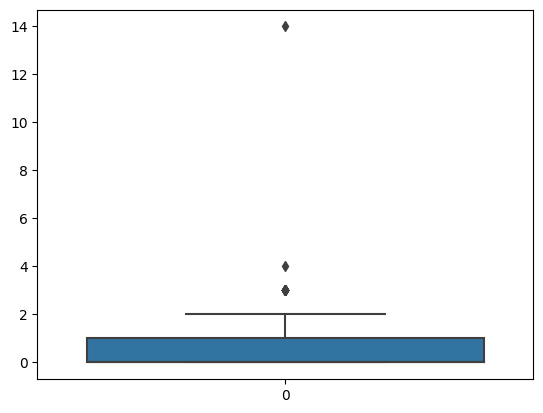

In [ ]:
sns.boxplot(c['CHILDREN'])

In [ ]:
Q1 = c['CHILDREN'].quantile(.25)
Q3 = c['CHILDREN'].quantile(.75)
IQR = Q3 - Q1
LOWER=Q1-(1.5*IQR)
HIGHER=Q3+(1.5*IQR)
print(LOWER)
print(HIGHER)

-1.5
2.5


<Axes: >

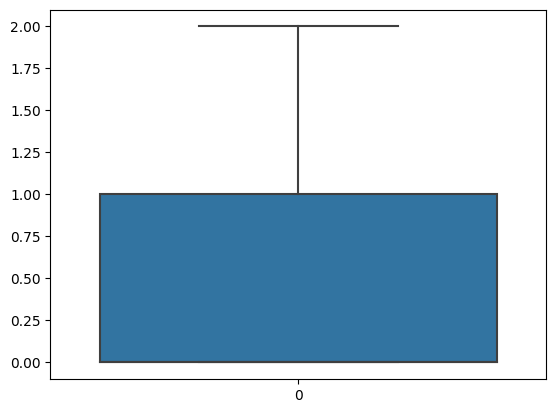

In [ ]:
#replacing outliers with median as there are only few only outliers
c['CHILDREN']=np.where(c['CHILDREN']>HIGHER,c['CHILDREN'].median(),c['CHILDREN'])
sns.boxplot(c['CHILDREN'])
#When there is strong evidence or suspicion that outliers are due to errors in data entry or measurement
#c['Employed_days'] = np.where(c['Employed_days'] > high,high,np.where(c['Employed_days'] < low,low,c['Employed_days']))





-33750.0
380250.0


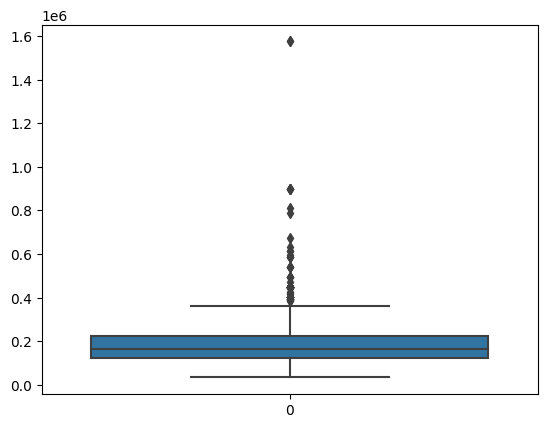

In [ ]:
#pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.boxplot(c['Annual_income'])
Q1 = c['Annual_income'].quantile(.25)
Q3 = c['Annual_income'].quantile(.75)
IQR = Q3 - Q1
LOWER=Q1-(1.5*IQR)
HIGHER=Q3+(1.5*IQR)
print(LOWER)
print(HIGHER)

In [ ]:
c['Annual_income'].median()

166500.0

<Axes: >

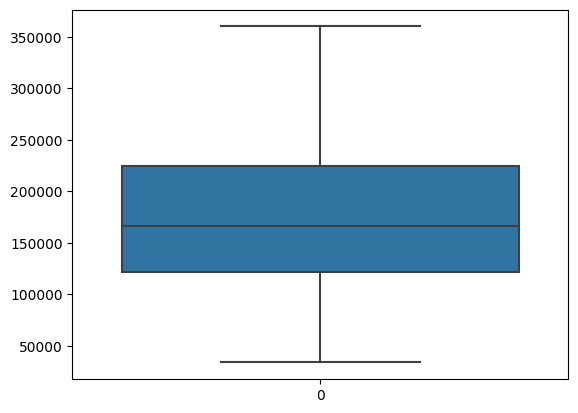

In [ ]:
#replacing outliers with median
c['Annual_income'] = np.where(c['Annual_income'] > HIGHER,c['Annual_income'].median(),c['Annual_income'])
sns.boxplot(c['Annual_income'])

<Axes: >

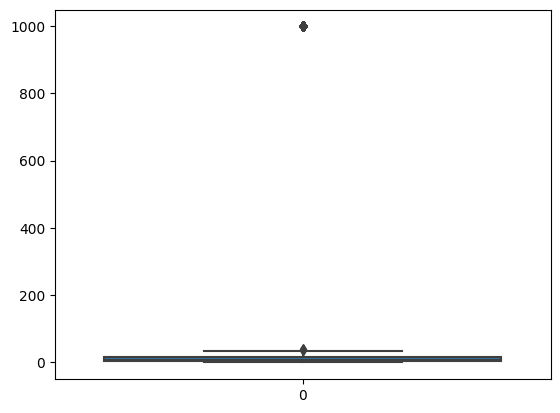

In [ ]:
sns.boxplot(c['employed_years'])

In [ ]:
c['employed_years'].median()

6.0

In [ ]:
Q1 = c['employed_years'].quantile(.25)
Q3 = c['employed_years'].quantile(.75)
IQR = Q3 - Q1
LOWER=Q1-(1.5*IQR)
HIGHER=Q3+(1.5*IQR)
print(IQR)
print(LOWER)
print(HIGHER)



13.0
-16.5
35.5


<Axes: >

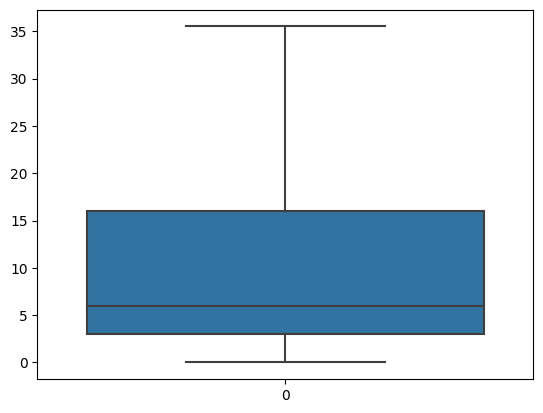

In [ ]:
#replacing outliers
c['employed_years'] = np.where(c['employed_years'] > HIGHER,HIGHER,c['employed_years'])
sns.boxplot(c['employed_years'])

<Axes: >

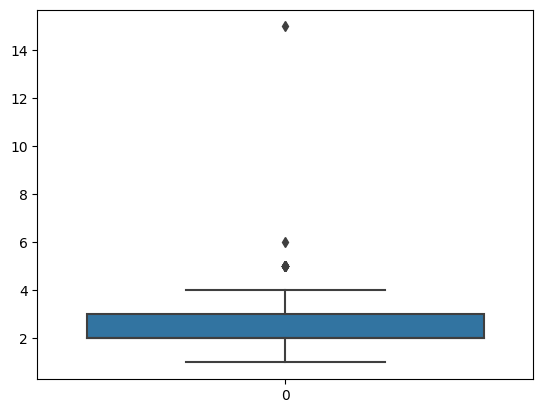

In [ ]:
sns.boxplot(c['Family_Members'])

In [ ]:
Q1 = c['Family_Members'].quantile(.25)
Q3 = c['Family_Members'].quantile(.75)
IQR = Q3 - Q1
LOWER=Q1-(1.5*IQR)
HIGHER=Q3+(1.5*IQR)
print(LOWER)
print(HIGHER)


0.5
4.5


<Axes: >

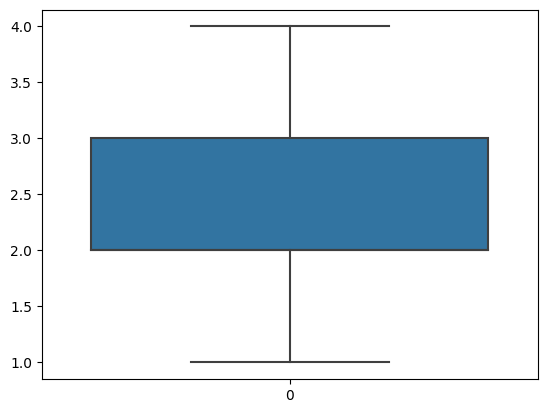

In [ ]:
#only 3 outliers--replacing with higher value
c['Family_Members']=np.where(c['Family_Members']>HIGHER,c['Family_Members'].median(),c['Family_Members'])
sns.boxplot(c['Family_Members'])

# **MISSING VALUES**

In [ ]:
c.isnull().sum()/c.shape[0]*100

Ind_ID              0.000000
gender              0.452196
Car_Owner           0.000000
property_owner      0.000000
children            0.000000
Annual_income       1.485788
Type_Income         0.000000
EDUCATION           0.000000
Marital_status      0.000000
Housing_type        0.000000
age                 1.421189
employed_years      0.000000
Mobile_phone        0.000000
Work_Phone          0.000000
Phone               0.000000
EMAIL_ID            0.000000
Type_Occupation    31.524548
Family_Members      0.000000
is_highrisk         0.000000
dtype: float64

In [ ]:
#GENDER
c[c['gender'].isnull()]

Ind_ID gender Car_Owner property_owner  children  Annual_income  \
5    5009753    NaN         Y              N         0       315000.0   
28   5025127    NaN         N              Y         0       292500.0   
82   5068651    NaN         Y              Y         0       360000.0   
143  5126278    NaN         N              N         0       162000.0   
171  5149192    NaN         Y              N         1       450000.0   
188  5054058    NaN         Y              N         1       450000.0   
240  5028615    NaN         Y              Y         0       225000.0   

              Type_Income                      EDUCATION  \
5               Pensioner               Higher education   
28                Working  Secondary / secondary special   
82          State servant               Higher education   
143             Pensioner  Secondary / secondary special   
171               Working               Higher education   
188               Working               Higher education   
240  Commercial associate               Higher education   

           Marital_status       Housing_type   age  employed_years  \
5                 Married  House / apartment  37.0             1.0   
28                Married  House / apartment  30.0             9.0   
82              Separated  House / apartment  52.0             5.0   
143               Married  House / apartment  58.0            35.5   
171               Married  House / apartment  26.0             1.0   
188               Married  House / apartment  41.0            12.0   
240  Single / not married       With parents  29.0             5.0   

     Mobile_phone  Work_Phone  Phone  EMAIL_ID        Type_Occupation  \
5               1           1      1         0                    NaN   
28              1           0      0         0  High skill tech staff   
82              1           0      0         0             Core staff   
143             1           0      0         0                    NaN   
171             1           0      1         1             Core staff   
188             1           0      1         0               Managers   
240             1           0      1         0            Sales staff   

     Family_Members  is_highrisk  
5               2.0            1  
28              2.0            1  
82              1.0            1  
143             2.0            1  
171             3.0            1  
188             3.0            0  
240             1.0            0

In [ ]:
#small set of values having missing values in  gender column-- they can be deleted or replaced with most frequent category
#deletion is not best thing, so we replace with mode of the gender feature
#filling missing values by mode() in GENDER feature
#missing completely at random type missing values
c['gender']=c['gender'].fillna(c['gender'].mode()[0],inplace=True)
c['gender'].isnull().sum()

0

In [ ]:
#Type_Occupation
c[c['Type_Occupation'].isnull()]

Ind_ID gender Car_Owner property_owner  children  Annual_income  \
0     5008827      M         Y              Y         0       180000.0   
1     5009744      F         Y              N         0       315000.0   
2     5009746      F         Y              N         0       315000.0   
3     5009749      F         Y              N         0            NaN   
4     5009752      F         Y              N         0       315000.0   
...       ...    ...       ...            ...       ...            ...   
1543  5028645      F         N              Y         0            NaN   
1544  5023655      F         N              N         0       225000.0   
1545  5115992      M         Y              Y         2       180000.0   
1546  5118219      M         Y              N         0       270000.0   
1547  5053790      F         Y              Y         0       225000.0   

               Type_Income                      EDUCATION  \
0                Pensioner               Higher education   
1     Commercial associate               Higher education   
2     Commercial associate               Higher education   
3     Commercial associate               Higher education   
4     Commercial associate               Higher education   
...                    ...                            ...   
1543  Commercial associate               Higher education   
1544  Commercial associate              Incomplete higher   
1545               Working               Higher education   
1546               Working  Secondary / secondary special   
1547               Working               Higher education   

            Marital_status       Housing_type   age  employed_years  \
0                  Married  House / apartment  51.0            35.5   
1                  Married  House / apartment  37.0             1.0   
2                  Married  House / apartment   NaN             1.0   
3                  Married  House / apartment  37.0             1.0   
4                  Married  House / apartment  37.0             1.0   
...                    ...                ...   ...             ...   
1543               Married  House / apartment  32.0             5.0   
1544  Single / not married  House / apartment  28.0             3.0   
1545               Married  House / apartment  36.0             6.0   
1546        Civil marriage  House / apartment  41.0             1.0   
1547               Married  House / apartment  45.0             7.0   

      Mobile_phone  Work_Phone  Phone  EMAIL_ID Type_Occupation  \
0                1           0      0         0            None   
1                1           1      1         0            None   
2                1           1      1         0            None   
3                1           1      1         0            None   
4                1           1      1         0            None   
...            ...         ...    ...       ...             ...   
1543             1           0      0         0            None   
1544             1           0      0         0            None   
1545             1           0      0         0            None   
1546             1           1      1         0            None   
1547             1           0      0         0            None   

      Family_Members  is_highrisk  
0                2.0            1  
1                2.0            1  
2                2.0            1  
3                2.0            1  
4                2.0            1  
...              ...          ...  
1543             2.0            0  
1544             1.0            0  
1545             4.0            0  
1546             2.0            0  
1547             2.0            0  

[1548 rows x 19 columns]

In [ ]:
c['Type_Occupation'].value_counts()

Laborers    1548
Name: Type_Occupation, dtype: int64

<Axes: xlabel='employed_years', ylabel='Count'>

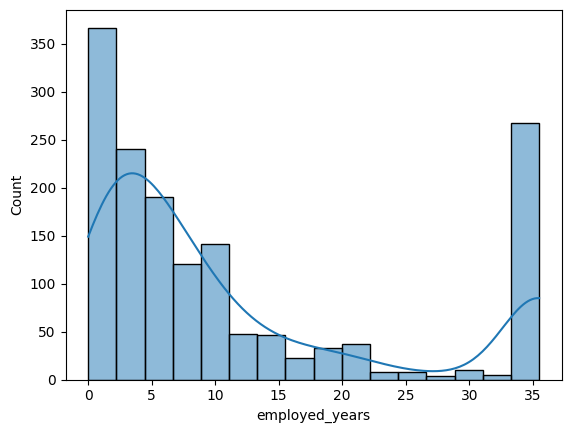

In [ ]:
sns.histplot(c["employed_years"],kde=True)

In [ ]:
c['Type_Occupation']=c['Type_Occupation'].fillna("Laborers")

In [ ]:
c['Type_Occupation'].isnull().sum()

0

In [ ]:
csc=pd.read_csv("Credit_card[2].csv")


In [ ]:
csc['Type_Occupation']=csc['Type_Occupation'].fillna(csc['Type_Occupation'].mode()[0])
csc['Type_Occupation'].isnull().sum()

KeyError: ignored

In [ ]:
df=c.copy()
df

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0     5008827      M         Y             Y         0       180000.0   
1     5009744      F         Y             N         0       315000.0   
2     5009746      F         Y             N         0       315000.0   
3     5009749      F         Y             N         0            NaN   
4     5009752      F         Y             N         0       315000.0   
...       ...    ...       ...           ...       ...            ...   
1543  5028645      F         N             Y         0            NaN   
1544  5023655      F         N             N         0       225000.0   
1545  5115992      M         Y             Y         2       180000.0   
1546  5118219      M         Y             N         0       270000.0   
1547  5053790      F         Y             Y         0       225000.0   

               Type_Income                      EDUCATION  \
0                Pensioner               Higher education   
1     Commercial associate               Higher education   
2     Commercial associate               Higher education   
3     Commercial associate               Higher education   
4     Commercial associate               Higher education   
...                    ...                            ...   
1543  Commercial associate               Higher education   
1544  Commercial associate              Incomplete higher   
1545               Working               Higher education   
1546               Working  Secondary / secondary special   
1547               Working               Higher education   

            Marital_status       Housing_type  Birthday_count  Employed_days  \
0                  Married  House / apartment        -18772.0         365243   
1                  Married  House / apartment        -13557.0           -586   
2                  Married  House / apartment             NaN           -586   
3                  Married  House / apartment        -13557.0           -586   
4                  Married  House / apartment        -13557.0           -586   
...                    ...                ...             ...            ...   
1543               Married  House / apartment        -11957.0          -2182   
1544  Single / not married  House / apartment        -10229.0          -1209   
1545               Married  House / apartment        -13174.0          -2477   
1546        Civil marriage  House / apartment        -15292.0           -645   
1547               Married  House / apartment        -16601.0          -2859   

      Mobile_phone  Work_Phone  Phone  EMAIL_ID Type_Occupation  \
0                1           0      0         0             NaN   
1                1           1      1         0             NaN   
2                1           1      1         0             NaN   
3                1           1      1         0             NaN   
4                1           1      1         0             NaN   
...            ...         ...    ...       ...             ...   
1543             1           0      0         0        Managers   
1544             1           0      0         0     Accountants   
1545             1           0      0         0        Managers   
1546             1           1      1         0         Drivers   
1547             1           0      0         0             NaN   

      Family_Members  label  
0                  2      1  
1                  2      1  
2                  2      1  
3                  2      1  
4                  2      1  
...              ...    ...  
1543               2      0  
1544               1      0  
1545               4      0  
1546               2      0  
1547               2      0  

[1548 rows x 19 columns]

Index(['Ind_ID', 'gender', 'Car_Owner', 'property_owner', 'children',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'age', 'employed_years', 'Mobile_phone', 'Work_Phone',
       'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
       'is_highrisk'],
      dtype='object')

In [ ]:
c.columns

Index(['Ind_ID', 'gender', 'Car_Owner', 'property_owner', 'children',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'age', 'employed_years', 'Mobile_phone', 'Work_Phone',
       'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
       'is_highrisk'],
      dtype='object')

In [ ]:
c.columns

Index(['Ind_ID', 'gender', 'Car_Owner', 'property_owner', 'children',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'age', 'employed_years', 'Mobile_phone', 'Work_Phone',
       'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
       'is_highrisk'],
      dtype='object')

In [ ]:
c

Ind_ID  gender  Car_Owner  property_owner  children  Annual_income  \
0     5008827       0          1               1         0       180000.0   
1     5009744       1          1               0         0       315000.0   
2     5009746       1          1               0         0       315000.0   
3     5009749       1          1               0         0            NaN   
4     5009752       1          1               0         0       315000.0   
...       ...     ...        ...             ...       ...            ...   
1543  5028645       1          0               1         0            NaN   
1544  5023655       1          0               0         0       225000.0   
1545  5115992       0          1               1         2       180000.0   
1546  5118219       0          1               0         0       270000.0   
1547  5053790       1          1               1         0       225000.0   

               Type_Income Marital_status       Housing_type   age  \
0                Pensioner        Married  House / apartment  51.0   
1     Commercial associate        Married  House / apartment  37.0   
2     Commercial associate        Married  House / apartment   NaN   
3     Commercial associate        Married  House / apartment  37.0   
4     Commercial associate        Married  House / apartment  37.0   
...                    ...            ...                ...   ...   
1543  Commercial associate        Married  House / apartment  32.0   
1544  Commercial associate         Single  House / apartment  28.0   
1545               Working        Married  House / apartment  36.0   
1546               Working        Married  House / apartment  41.0   
1547               Working        Married  House / apartment  45.0   

      employed_years  Mobile_phone  Work_Phone  Phone  EMAIL_ID  \
0              999.0             1           0      0         0   
1                1.0             1           1      1         0   
2                1.0             1           1      1         0   
3                1.0             1           1      1         0   
4                1.0             1           1      1         0   
...              ...           ...         ...    ...       ...   
1543             5.0             1           0      0         0   
1544             3.0             1           0      0         0   
1545             6.0             1           0      0         0   
1546             1.0             1           1      1         0   
1547             7.0             1           0      0         0   

     Type_Occupation  Family_Members  is_highrisk  education  
0                NaN               2            1        3.0  
1                NaN               2            1        3.0  
2                NaN               2            1        3.0  
3                NaN               2            1        3.0  
4                NaN               2            1        3.0  
...              ...             ...          ...        ...  
1543        Managers               2            0        3.0  
1544     Accountants               1            0        1.0  
1545        Managers               4            0        3.0  
1546         Drivers               2            0        2.0  
1547             NaN               2            0        3.0  

[1548 rows x 19 columns]

In [ ]:
#GENDER COLUMN ANALYSING
print("most_frequent_value:",cc['GENDER'].mode()[0])
cc['GENDER'].value_counts()

most_frequent_value: F


F    973
M    568
Name: GENDER, dtype: int64

In [ ]:
#analysing missing values in GENDER feature
cc[cc['GENDER'].isnull()]

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
5    5009753    NaN         Y             N         0       315000.0   
28   5025127    NaN         N             Y         0       292500.0   
82   5068651    NaN         Y             Y         0       360000.0   
143  5126278    NaN         N             N         0       162000.0   
171  5149192    NaN         Y             N         1       450000.0   
188  5054058    NaN         Y             N         1       450000.0   
240  5028615    NaN         Y             Y         0       225000.0   

              Type_Income                      EDUCATION  \
5               Pensioner               Higher education   
28                Working  Secondary / secondary special   
82          State servant               Higher education   
143             Pensioner  Secondary / secondary special   
171               Working               Higher education   
188               Working               Higher education   
240  Commercial associate               Higher education   

           Marital_status       Housing_type  Birthday_count  Employed_days  \
5                 Married  House / apartment        -13557.0           -586   
28                Married  House / apartment        -11111.0          -3350   
82              Separated  House / apartment        -19305.0          -1905   
143               Married  House / apartment        -21244.0         365243   
171               Married  House / apartment         -9847.0           -502   
188               Married  House / apartment        -15045.0          -4686   
240  Single / not married       With parents        -10681.0          -2152   

     Mobile_phone  Work_Phone  Phone  EMAIL_ID        Type_Occupation  \
5               1           1      1         0                    NaN   
28              1           0      0         0  High skill tech staff   
82              1           0      0         0             Core staff   
143             1           0      0         0                    NaN   
171             1           0      1         1             Core staff   
188             1           0      1         0               Managers   
240             1           0      1         0            Sales staff   

     Family_Members  
5                 2  
28                2  
82                1  
143               2  
171               3  
188               3  
240               1

In [ ]:
#deleting missing values in gender featurE---XXXXXXXXXXXXXXXXXXXXXXXX
#due to small no of missing values we are deleting them
cr=cc.dropna(subset=['GENDER'],inplace=True)

In [ ]:
cc['GENDER_NA']=np.where(cc['GENDER'].isnull(),1,0)
cc['GENDER_NA']


0       0
1       0
2       0
3       0
4       0
       ..
1543    0
1544    0
1545    0
1546    0
1547    0
Name: GENDER_NA, Length: 1548, dtype: int64

In [ ]:
#small set of values having missing values in  gender column-- they can be deleted or replaced with most frequent category
#deletion is not best thing, so we replace with mode of the gender feature
#filling missing values by mode() in GENDER feature
#missing completely at random type missing values
c['GENDER']=c['GENDER'].fillna(c['GENDER'].mode()[0])
c['GENDER'].isnull().sum()

0

In [ ]:
#annual income column null values
c["Annual_income"].isnull().sum()


23

In [ ]:
#analysing missing values rows in annual_income feature
#all nan values in annual income has a pattern, i.e where housing_type=house/apartment
c[c['Annual_income'].isnull()]

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
3     5009749      F         Y             N         0            NaN   
12    5018501      F         Y             Y         0            NaN   
27    5024917      F         N             Y         0            NaN   
65    5058348      F         N             Y         0            NaN   
76    5062137      M         N             Y         1            NaN   
107   5105056      M         Y             N         0            NaN   
125   5116305      F         N             Y         0            NaN   
152   5142183      M         Y             Y         2            NaN   
185   5033574      F         Y             Y         1            NaN   
215   5085769      F         N             Y         0            NaN   
273   5047704      F         N             Y         2            NaN   
324   5069227      F         Y             Y         0            NaN   
381   5021682      M         N             Y         0            NaN   
429   5149353      M         Y             Y         0            NaN   
474   5051180      M         Y             N         1            NaN   
561   5024636      F         N             Y         0            NaN   
720   5024103      M         N             Y         0            NaN   
915   5143620      F         N             Y         0            NaN   
1011  5048305      F         N             N         0            NaN   
1263  5092147      M         Y             Y         0            NaN   
1299  5089556      F         Y             N         0            NaN   
1386  5035431      M         Y             Y         0            NaN   
1543  5028645      F         N             Y         0            NaN   

               Type_Income                      EDUCATION  \
3     Commercial associate               Higher education   
12                 Working  Secondary / secondary special   
27               Pensioner  Secondary / secondary special   
65               Pensioner               Higher education   
76                 Working  Secondary / secondary special   
107   Commercial associate               Higher education   
125              Pensioner  Secondary / secondary special   
152   Commercial associate               Higher education   
185                Working  Secondary / secondary special   
215   Commercial associate  Secondary / secondary special   
273                Working  Secondary / secondary special   
324   Commercial associate  Secondary / secondary special   
381   Commercial associate  Secondary / secondary special   
429   Commercial associate               Higher education   
474                Working  Secondary / secondary special   
561                Working  Secondary / secondary special   
720                Working  Secondary / secondary special   
915              Pensioner  Secondary / secondary special   
1011               Working               Higher education   
1263               Working  Secondary / secondary special   
1299               Working              Incomplete higher   
1386               Working  Secondary / secondary special   
1543  Commercial associate               Higher education   

            Marital_status         Housing_type  Birthday_count  \
3                  Married    House / apartment        -13557.0   
12                 Married    House / apartment        -18950.0   
27                 Married    House / apartment        -21832.0   
65               Separated    House / apartment        -24611.0   
76    Single / not married    House / apartment        -12947.0   
107   Single / not married  Municipal apartment        -11528.0   
125                Married    House / apartment        -22655.0   
152                Married    House / apartment        -17841.0   
185                Married    House / apartment        -14222.0   
215                Married    House / apartment        -19310.0   
273   Single / not married    House / apartment     

In [ ]:
#median of annual income group by housing type categories
c.groupby("Housing_type")["Annual_income"].median()

Housing_type
Co-op apartment        112500.0
House / apartment      166500.0
Municipal apartment    141750.0
Office apartment       157500.0
Rented apartment       202500.0
With parents           180000.0
Name: Annual_income, dtype: float64

In [ ]:
#replacing null values by median of annual_income with category house/apartment
c['Annual_income']=c['Annual_income'].fillna(166500.0)
c['Annual_income'].isnull().sum()

0

In [ ]:
c.isnull().sum()

Ind_ID               0
GENDER               0
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income        0
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [ ]:
#BIRTHDAY COUNT(AGE) COLUMN ANALYSING AND HANDLING MISSING VALUES
c['Birthday_count'].describe()

count     1526.000000
mean    -16040.342071
std       4229.503202
min     -24946.000000
25%     -19553.000000
50%     -15661.500000
75%     -12417.000000
max      -7705.000000
Name: Birthday_count, dtype: float64

In [ ]:
#converting to years
c['Birthday_count']=np.abs(c['Birthday_count'])//365.25
c['Birthday_count'].describe()

count    1526.000000
mean       43.419397
std        11.582791
min        21.000000
25%        33.000000
50%        42.000000
75%        53.000000
max        68.000000
Name: Birthday_count, dtype: float64

In [ ]:
#Visualising missing vlaues in Birthday_count feature
#we can see a pattern where housing_type=housing/apartment and email_id=0
#only one row with housing type=municipal apartment, remaining all rows having house/apartment type
c[c['Birthday_count'].isnull()]

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
2     5009746      F         Y             N         0       315000.0   
70    5058532      M         N             N         0       391500.0   
205   5066627      M         Y             Y         0       157500.0   
388   5095193      M         Y             Y         1       495000.0   
473   5054699      M         Y             Y         0       157500.0   
503   5132264      F         N             N         0       144000.0   
539   5065820      M         Y             Y         1       157500.0   
584   5105743      M         Y             N         2       112500.0   
626   5029191      F         N             Y         0       202500.0   
689   5041681      F         N             N         0        94500.0   
743   5117561      F         N             N         0       135000.0   
782   5066458      F         Y             Y         0       135000.0   
835   5091457      F         N             Y         2       103500.0   
877   5100352      M         N             N         0       180000.0   
919   5041921      M         N             N         0       135000.0   
991   5044478      F         N             N         0       135000.0   
1101  5142448      M         Y             Y         0       315000.0   
1199  5048448      F         N             Y         0       202500.0   
1285  5044669      F         N             Y         0        76500.0   
1415  5142547      F         Y             Y         0       157500.0   
1446  5100010      M         Y             N         0       202500.0   
1541  5117065      F         N             Y         2       225000.0   

               Type_Income                      EDUCATION  \
2     Commercial associate               Higher education   
70                 Working  Secondary / secondary special   
205                Working  Secondary / secondary special   
388   Commercial associate  Secondary / secondary special   
473                Working               Higher education   
503                Working  Secondary / secondary special   
539                Working  Secondary / secondary special   
584                Working               Higher education   
626                Working  Secondary / secondary special   
689              Pensioner  Secondary / secondary special   
743                Working  Secondary / secondary special   
782                Working  Secondary / secondary special   
835                Working  Secondary / secondary special   
877                Working  Secondary / secondary special   
919              Pensioner  Secondary / secondary special   
991                Working  Secondary / secondary special   
1101               Working              Incomplete higher   
1199             Pensioner  Secondary / secondary special   
1285             Pensioner  Secondary / secondary special   
1415  Commercial associate               Higher education   
1446               Working  Secondary / secondary special   
1541               Working               Higher education   

            Marital_status         Housing_type  Birthday_count  \
2                  Married    House / apartment             NaN   
70    Single / not married  Municipal apartment             NaN   
205                Married    House / apartment             NaN   
388                Married    House / apartment             NaN   
473                Married    House / apartment             NaN   
503                Married    House / apartment             NaN   
539                Married    House / apartment             NaN   
584                Married    House / apartment             NaN   
626                Married    House / apartment             NaN   
689                Married    House / apartment             NaN   
743                Married    House / apartment             NaN   
782              Separated    House / apartment             NaN   
835                Married    House / apartment     

In [ ]:
#avg age grouped  by housing type
c.groupby('Housing_type')['Birthday_count'].mean()

Housing_type
Co-op apartment        46.600000
House / apartment      44.100074
Municipal apartment    43.961538
Office apartment       46.333333
Rented apartment       35.142857
With parents           33.150000
Name: Birthday_count, dtype: float64

In [ ]:
c['Birthday_count'].mean()

43.419397116644824

In [ ]:
#avg age grouped by emaild categories
c.groupby('EMAIL_ID')['Birthday_count'].mean()

EMAIL_ID
0    44.038322
1    37.433566
Name: Birthday_count, dtype: float64

<Axes: xlabel='Birthday_count', ylabel='Count'>

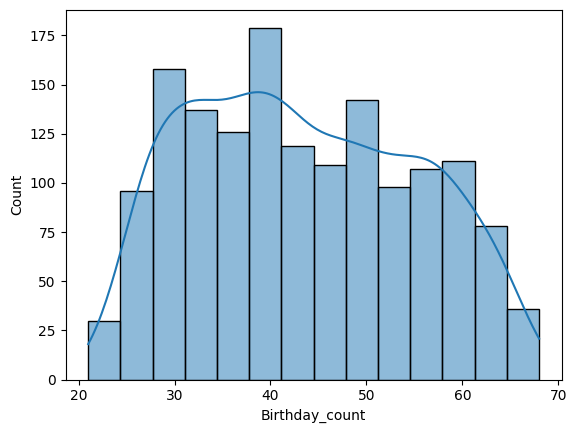

In [ ]:
#almost normal distribution- we can replace by mean in the missing values
sns.histplot(c['Birthday_count'],kde=True)

In [ ]:
#mean value of age where email=0 is 44
#mean value of age where housing_type=house/apartment is 44
#hence replacing missing values of Birthday_count by value 44
c['Birthday_count']=c['Birthday_count'].fillna(44.0)
c['Birthday_count'].isnull().sum()

0

In [ ]:
c['Type_Occupation'].isnull().sum()

488

In [ ]:
#visualising missing values in Type_occupation
#most common thing is housing type=house/apartment
c_occ=c[c['Type_Occupation'].isnull()]
c_occ

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0     5008827      M         Y             Y         0       180000.0   
1     5009744      F         Y             N         0       315000.0   
2     5009746      F         Y             N         0       315000.0   
3     5009749      F         Y             N         0            NaN   
4     5009752      F         Y             N         0       315000.0   
...       ...    ...       ...           ...       ...            ...   
1530  5089954      M         N             Y         1       126000.0   
1531  5048642      F         N             N         0       157500.0   
1532  5125261      M         N             Y         0       157500.0   
1535  5089719      F         N             N         0       144000.0   
1547  5053790      F         Y             Y         0       225000.0   

               Type_Income                      EDUCATION  Marital_status  \
0                Pensioner               Higher education         Married   
1     Commercial associate               Higher education         Married   
2     Commercial associate               Higher education         Married   
3     Commercial associate               Higher education         Married   
4     Commercial associate               Higher education         Married   
...                    ...                            ...             ...   
1530  Commercial associate  Secondary / secondary special  Civil marriage   
1531             Pensioner  Secondary / secondary special       Separated   
1532  Commercial associate               Higher education         Married   
1535               Working  Secondary / secondary special         Married   
1547               Working               Higher education         Married   

           Housing_type  Birthday_count  Employed_days  Mobile_phone  \
0     House / apartment            51.0         365243             1   
1     House / apartment            37.0           -586             1   
2     House / apartment             NaN           -586             1   
3     House / apartment            37.0           -586             1   
4     House / apartment            37.0           -586             1   
...                 ...             ...            ...           ...   
1530  House / apartment            34.0          -2105             1   
1531  House / apartment            65.0         365243             1   
1532  House / apartment            42.0          -1200             1   
1535  House / apartment            54.0          -4662             1   
1547  House / apartment            45.0          -2859             1   

      Work_Phone  Phone  EMAIL_ID Type_Occupation  Family_Members  label  
0              0      0         0             NaN               2      1  
1              1      1         0             NaN               2      1  
2              1      1         0             NaN               2      1  
3              1      1         0             NaN               2      1  
4              1      1         0             NaN               2      1  
...          ...    ...       ...             ...             ...    ...  
1530           0      0         0             NaN               3      0  
1531           0      0         0             NaN               1      0  
1532           1      1         0             NaN               2      0  
1535           0      1         0             NaN               2      0  
1547           0      0         0             NaN               2      0  

[488 rows x 19 columns]

In [ ]:
#house/apartment is most highest in null values and covers majority of missing values
c_occ['Housing_type'].value_counts()

House / apartment      447
Municipal apartment     21
With parents            12
Rented apartment         8
Name: Housing_type, dtype: int64

In [ ]:
c_occ['Type_Income'].value_counts()

Pensioner               264
Working                 129
Commercial associate     77
State servant            18
Name: Type_Income, dtype: int64

In [ ]:
c.groupby('Housing_type')['Type_Occupation'].mode()

AttributeError: ignored

In [ ]:
#grouping housing_type=housing/apartment and Type_occupation column
cht=c.loc[(c['Housing_type'].str.startswith('House')),['Type_Occupation','Housing_type']]
cht['Type_Occupation'].value_counts()

Laborers                 239
Core staff               150
Managers                 126
Sales staff              100
Drivers                   73
High skill tech staff     60
Medicine staff            46
Accountants               40
Security staff            21
Cleaning staff            17
Private service staff     16
Cooking staff             15
Secretaries                9
Low-skill Laborers         9
Waiters/barmen staff       5
HR staff                   3
IT staff                   2
Realty agents              2
Name: Type_Occupation, dtype: int64

In [ ]:
#encoding columns
c['GENDER'].replace("M",0,inplace=True)
c['GENDER'].replace("F",1,inplace=True)
c['Car_Owner'].replace("Y",1,inplace=True)
c['Car_Owner'].replace("N",0,inplace=True)
c['Propert_Owner'].replace("Y",1,inplace=True)
c['Propert_Owner'].replace("N",0,inplace=True)

In [ ]:
c['EDUCATION'].value_counts()

Secondary / secondary special    1031
Higher education                  426
Incomplete higher                  68
Lower secondary                    21
Academic degree                     2
Name: EDUCATION, dtype: int64

In [ ]:
#ordinal encoding for EDUCATION column
from sklearn.preprocessing import OrdinalEncoder
encoder=OrdinalEncoder(categories=[['Lower secondary','Incomplete higher','Secondary / secondary special','Higher education','Academic degree']])
c['education']=encoder.fit_transform(c[['EDUCATION']])
c.drop("EDUCATION",axis=1,inplace=True)

In [ ]:
c['Marital_status'].value_counts()

Married                 1049
Single / not married     227
Civil marriage           101
Separated                 96
Widow                     75
Name: Marital_status, dtype: int64

In [ ]:
c['Marital_status'].replace("Civil marriage","Married",inplace=True)
c['Marital_status'].replace("Widow","Separated",inplace=True)
c['Marital_status'].replace("Single / not married","Single",inplace=True)
c['Marital_status'].value_counts()

Married      1150
Single        227
Separated     171
Name: Marital_status, dtype: int64

In [ ]:
#one hot encoding for nominal features
#'Marital status', 'Housing_type'

In [ ]:
c.columns
c

Ind_ID  GENDER  Car_Owner  Propert_Owner  CHILDREN  Annual_income  \
0     5008827       0          1              1         0       180000.0   
1     5009744       1          1              0         0       315000.0   
2     5009746       1          1              0         0       315000.0   
3     5009749       1          1              0         0            NaN   
4     5009752       1          1              0         0       315000.0   
...       ...     ...        ...            ...       ...            ...   
1543  5028645       1          0              1         0            NaN   
1544  5023655       1          0              0         0       225000.0   
1545  5115992       0          1              1         2       180000.0   
1546  5118219       0          1              0         0       270000.0   
1547  5053790       1          1              1         0       225000.0   

               Type_Income                      EDUCATION  \
0                Pensioner               Higher education   
1     Commercial associate               Higher education   
2     Commercial associate               Higher education   
3     Commercial associate               Higher education   
4     Commercial associate               Higher education   
...                    ...                            ...   
1543  Commercial associate               Higher education   
1544  Commercial associate              Incomplete higher   
1545               Working               Higher education   
1546               Working  Secondary / secondary special   
1547               Working               Higher education   

            Marital_status       Housing_type  Birthday_count  Employed_days  \
0                  Married  House / apartment        -18772.0         365243   
1                  Married  House / apartment        -13557.0           -586   
2                  Married  House / apartment             NaN           -586   
3                  Married  House / apartment        -13557.0           -586   
4                  Married  House / apartment        -13557.0           -586   
...                    ...                ...             ...            ...   
1543               Married  House / apartment        -11957.0          -2182   
1544  Single / not married  House / apartment        -10229.0          -1209   
1545               Married  House / apartment        -13174.0          -2477   
1546        Civil marriage  House / apartment        -15292.0           -645   
1547               Married  House / apartment        -16601.0          -2859   

      Mobile_phone  Work_Phone  Phone  EMAIL_ID Type_Occupation  \
0                1           0      0         0             NaN   
1                1           1      1         0             NaN   
2                1           1      1         0             NaN   
3                1           1      1         0             NaN   
4                1           1      1         0             NaN   
...            ...         ...    ...       ...             ...   
1543             1           0      0         0        Managers   
1544             1           0      0         0     Accountants   
1545             1           0      0         0        Managers   
1546             1           1      1         0         Drivers   
1547             1           0      0         0             NaN   

      Family_Members  label  
0                  2      1  
1                  2      1  
2                  2      1  
3                  2      1  
4                  2      1  
...              ...    ...  
1543               2      0  
1544               1      0  
1545               4      0  
1546               2      0  
1547               2      0  

[1548 rows x 19 columns]

In [ ]:
#encoding nominal columns-Marital_status,Housing_type,Type_occupation
from sklearn.preprocesing import OneHotEncoder
encoder=OnehotEncoder()
c

Ind_ID  GENDER  Car_Owner  Propert_Owner  CHILDREN  Annual_income  \
0     5008827       0          1              1         0       180000.0   
1     5009744       1          1              0         0       315000.0   
2     5009746       1          1              0         0       315000.0   
3     5009749       1          1              0         0            NaN   
4     5009752       1          1              0         0       315000.0   
...       ...     ...        ...            ...       ...            ...   
1543  5028645       1          0              1         0            NaN   
1544  5023655       1          0              0         0       225000.0   
1545  5115992       0          1              1         2       180000.0   
1546  5118219       0          1              0         0       270000.0   
1547  5053790       1          1              1         0       225000.0   

               Type_Income                      EDUCATION  \
0                Pensioner               Higher education   
1     Commercial associate               Higher education   
2     Commercial associate               Higher education   
3     Commercial associate               Higher education   
4     Commercial associate               Higher education   
...                    ...                            ...   
1543  Commercial associate               Higher education   
1544  Commercial associate              Incomplete higher   
1545               Working               Higher education   
1546               Working  Secondary / secondary special   
1547               Working               Higher education   

            Marital_status       Housing_type  Birthday_count  Employed_days  \
0                  Married  House / apartment            51.0         365243   
1                  Married  House / apartment            37.0           -586   
2                  Married  House / apartment             NaN           -586   
3                  Married  House / apartment            37.0           -586   
4                  Married  House / apartment            37.0           -586   
...                    ...                ...             ...            ...   
1543               Married  House / apartment            32.0          -2182   
1544  Single / not married  House / apartment            28.0          -1209   
1545               Married  House / apartment            36.0          -2477   
1546        Civil marriage  House / apartment            41.0           -645   
1547               Married  House / apartment            45.0          -2859   

      Mobile_phone  Work_Phone  Phone  EMAIL_ID Type_Occupation  \
0                1           0      0         0             NaN   
1                1           1      1         0             NaN   
2                1           1      1         0             NaN   
3                1           1      1         0             NaN   
4                1           1      1         0             NaN   
...            ...         ...    ...       ...             ...   
1543             1           0      0         0        Managers   
1544             1           0      0         0     Accountants   
1545             1           0      0         0        Managers   
1546             1           1      1         0         Drivers   
1547             1           0      0         0             NaN   

      Family_Members  label  
0                  2      1  
1                  2      1  
2                  2      1  
3                  2      1  
4                  2      1  
...              ...    ...  
1543               2      0  
1544               1      0  
1545               4      0  
1546               2      0  
1547               2      0  

[1548 rows x 19 columns]

In [ ]:
cc

Ind_ID  GENDER  Car_Owner  Propert_Owner  CHILDREN  Annual_income  \
0     5008827     0.0          1              1         0       180000.0   
1     5009744     1.0          1              0         0       315000.0   
2     5009746     1.0          1              0         0       315000.0   
3     5009749     1.0          1              0         0            NaN   
4     5009752     1.0          1              0         0       315000.0   
...       ...     ...        ...            ...       ...            ...   
1543  5028645     1.0          0              1         0            NaN   
1544  5023655     1.0          0              0         0       225000.0   
1545  5115992     0.0          1              1         2       180000.0   
1546  5118219     0.0          1              0         0       270000.0   
1547  5053790     1.0          1              1         0       225000.0   

               Type_Income                      EDUCATION  \
0                Pensioner               Higher education   
1     Commercial associate               Higher education   
2     Commercial associate               Higher education   
3     Commercial associate               Higher education   
4     Commercial associate               Higher education   
...                    ...                            ...   
1543  Commercial associate               Higher education   
1544  Commercial associate              Incomplete higher   
1545               Working               Higher education   
1546               Working  Secondary / secondary special   
1547               Working               Higher education   

            Marital_status       Housing_type  Birthday_count  Employed_days  \
0                  Married  House / apartment        -18772.0         365243   
1                  Married  House / apartment        -13557.0           -586   
2                  Married  House / apartment             NaN           -586   
3                  Married  House / apartment        -13557.0           -586   
4                  Married  House / apartment        -13557.0           -586   
...                    ...                ...             ...            ...   
1543               Married  House / apartment        -11957.0          -2182   
1544  Single / not married  House / apartment        -10229.0          -1209   
1545               Married  House / apartment        -13174.0          -2477   
1546        Civil marriage  House / apartment        -15292.0           -645   
1547               Married  House / apartment        -16601.0          -2859   

      Mobile_phone  Work_Phone  Phone  EMAIL_ID Type_Occupation  \
0                1           0      0         0             NaN   
1                1           1      1         0             NaN   
2                1           1      1         0             NaN   
3                1           1      1         0             NaN   
4                1           1      1         0             NaN   
...            ...         ...    ...       ...             ...   
1543             1           0      0         0        Managers   
1544             1           0      0         0     Accountants   
1545             1           0      0         0        Managers   
1546             1           1      1         0         Drivers   
1547             1           0      0         0             NaN   

      Family_Members  
0                  2  
1                  2  
2                  2  
3                  2  
4                  2  
...              ...  
1543               2  
1544               1  
1545               4  
1546               2  
1547               2  

[1548 rows x 18 columns]

In [ ]:
#using knn to replace values


In [ ]:
#to find most_frequent occupation in housing_type=house/apartment
cht['Type_Occupation'].value_counts()

Laborers                 239
Core staff               150
Managers                 126
Sales staff              100
Drivers                   73
High skill tech staff     60
Medicine staff            46
Accountants               40
Security staff            21
Cleaning staff            17
Private service staff     16
Cooking staff             15
Secretaries                9
Low-skill Laborers         9
Waiters/barmen staff       5
HR staff                   3
IT staff                   2
Realty agents              2
Name: Type_Occupation, dtype: int64

In [ ]:
#replacing missing values in type_occupation with the most frequent value
c['Type_Occupation']=c['Type_Occupation'].fillna("Laborers")
c['Type_Occupation'].isna().sum()

0

In [ ]:
c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1548 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1548 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1548 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [ ]:
c['Employed_days'].value_counts()

 365243    261
-586         6
-622         5
-460         5
-1678        5
          ... 
-3034        1
-1324        1
-3112        1
-2959        1
-2859        1
Name: Employed_days, Length: 956, dtype: int64

In [ ]:
#converting to years
c['Employed_days']=np.abs(c['Employed_days'])//365.25
c['Employed_days']

0       999.0
1         1.0
2         1.0
3         1.0
4         1.0
        ...  
1543      5.0
1544      3.0
1545      6.0
1546      1.0
1547      7.0
Name: Employed_days, Length: 1548, dtype: float64

In [ ]:
#many outliers in the feature
c['Employed_days'].value_counts()

999.0    261
1.0      149
4.0      131
2.0      113
3.0      109
6.0      107
0.0      105
5.0       83
9.0       66
8.0       64
7.0       56
10.0      50
12.0      27
14.0      27
11.0      25
13.0      21
15.0      20
18.0      19
20.0      16
22.0      14
19.0      14
17.0      12
16.0      11
23.0       7
21.0       7
25.0       6
31.0       5
29.0       5
27.0       3
32.0       3
33.0       2
26.0       2
35.0       2
36.0       1
40.0       1
34.0       1
24.0       1
37.0       1
28.0       1
Name: Employed_days, dtype: int64

In [ ]:
c['GEDNER'].value_counts()

F    980
M    568
Name: GEDNER, dtype: int64

In [ ]:
c['Car_Owner'].value_counts()

N    924
Y    624
Name: Car_Owner, dtype: int64

In [ ]:
c['Propert_Owner'].value_counts()

Y    1010
N     538
Name: Propert_Owner, dtype: int64

In [ ]:
c['CHILDREN'].value_counts()

0     1091
1      305
2      134
3       16
4        1
14       1
Name: CHILDREN, dtype: int64

In [ ]:
c['Type_Income'].value_counts()

Working                 798
Commercial associate    365
Pensioner               269
State servant           116
Name: Type_Income, dtype: int64

In [ ]:
c['EDUCATION'].value_counts()

Secondary / secondary special    1031
Higher education                  426
Incomplete higher                  68
Lower secondary                    21
Academic degree                     2
Name: EDUCATION, dtype: int64

In [ ]:
c['Marital_status'].value_counts()

Married                 1049
Single / not married     227
Civil marriage           101
Separated                 96
Widow                     75
Name: Marital_status, dtype: int64

In [ ]:
c['Housing_type'].value_counts()

House / apartment      1380
With parents             80
Municipal apartment      53
Rented apartment         21
Office apartment          9
Co-op apartment           5
Name: Housing_type, dtype: int64

In [ ]:
c['Mobile_phone'].value_counts()

1    1548
Name: Mobile_phone, dtype: int64

In [ ]:
c['Work_Phone'].value_counts()

0    1226
1     322
Name: Work_Phone, dtype: int64

In [ ]:
c['EMAIL_ID'].value_counts()

0    1405
1     143
Name: EMAIL_ID, dtype: int64

In [ ]:
c['Phone'].value_counts()

0    1069
1     479
Name: Phone, dtype: int64

In [ ]:
c['Type_Occupation'].value_counts()

Laborers                 756
Core staff               174
Managers                 136
Sales staff              122
Drivers                   86
High skill tech staff     65
Medicine staff            50
Accountants               44
Security staff            25
Cleaning staff            22
Cooking staff             21
Private service staff     17
Secretaries                9
Low-skill Laborers         9
Waiters/barmen staff       5
HR staff                   3
IT staff                   2
Realty agents              2
Name: Type_Occupation, dtype: int64

In [ ]:
c['Family_Members'].value_counts()

2     802
1     334
3     268
4     127
5      15
6       1
15      1
Name: Family_Members, dtype: int64

In [ ]:
#handling outliers in Employed_days
#IQR
Q1=np.percentile(c['Employed_days'],25)
print(Q1)
Q3=np.percentile(c['Employed_days'],75)
print(Q3)
IQR=Q3-Q1
print(IQR)
low=Q1-(1.5*IQR)
high=Q3+(1.5*IQR)
print(low,'\n',high)


3.0
16.0
13.0
-16.5 
 35.5


In [ ]:
outliers=[]
for i in c['Employed_days']:
        if (i<low or i>high):
            outliers.append(i)
print(outliers)


[999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 36.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 40.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 

In [ ]:
#replacing outliers with higher and lower limits
c['Employed_days'] = np.where(c['Employed_days'] > high,high,np.where(c['Employed_days'] < low,low,c['Employed_days']))
c['Employed_days'].value_counts()


35.5    264
1.0     149
4.0     131
2.0     113
3.0     109
6.0     107
0.0     105
5.0      83
9.0      66
8.0      64
7.0      56
10.0     50
14.0     27
12.0     27
11.0     25
13.0     21
15.0     20
18.0     19
20.0     16
22.0     14
19.0     14
17.0     12
16.0     11
21.0      7
23.0      7
25.0      6
31.0      5
29.0      5
27.0      3
32.0      3
33.0      2
26.0      2
35.0      2
34.0      1
24.0      1
28.0      1
Name: Employed_days, dtype: int64

In [ ]:
#for annual income
#handling outliers
#IQR
Q1=np.percentile(c['Annual_income'],25)
print(Q1)
Q3=np.percentile(c['Annual_income'],75)
print(Q3)
IQR=Q3-Q1
print(IQR)
low=Q1-(1.5*IQR)
high=Q3+(1.5*IQR)
print(low,'\n',high)


121500.0
225000.0
103500.0
-33750.0 
 380250.0


In [ ]:
#no outliers in annual_income
outlier=[]
for i in c['Annual_income']:
        if (i<low or i>high):
            outlier.append(i)
print(outlier)


[450000.0, 450000.0, 450000.0, 472500.0, 540000.0, 540000.0, 450000.0, 391500.0, 391500.0, 391500.0, 675000.0, 585000.0, 585000.0, 450000.0, 450000.0, 450000.0, 450000.0, 450000.0, 450000.0, 445500.0, 1575000.0, 1575000.0, 900000.0, 450000.0, 450000.0, 423000.0, 450000.0, 540000.0, 450000.0, 495000.0, 612000.0, 427500.0, 612000.0, 450000.0, 787500.0, 450000.0, 594000.0, 585000.0, 495000.0, 387000.0, 450000.0, 900000.0, 382500.0, 450000.0, 900000.0, 405000.0, 405000.0, 445500.0, 450000.0, 450000.0, 450000.0, 450000.0, 405000.0, 900000.0, 630000.0, 450000.0, 418500.0, 450000.0, 405000.0, 405000.0, 405000.0, 495000.0, 450000.0, 387000.0, 810000.0, 391500.0, 405000.0, 450000.0, 405000.0, 450000.0, 450000.0, 405000.0, 450000.0]


In [ ]:
#replacing outliers with higher and lower limits
c['Annual_income'] = np.where(c['Annual_income'] > high,high,np.where(c['Annual_income'] < low,low,c['Annual_income']))
c['Annual_income'].value_counts()

135000.0    170
112500.0    144
180000.0    137
157500.0    125
225000.0    119
           ... 
69372.0       1
37800.0       1
215100.0      1
333000.0      1
69750.0       1
Name: Annual_income, Length: 95, dtype: int64

<Axes: >

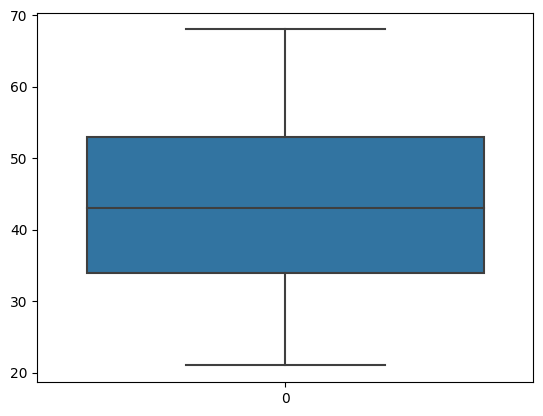

In [ ]:
sns.boxplot(c['Birthday_count'])